**GEREKLİ KÜTÜPHANELERİN YÜKLENMESİ VE VERİSETİNİN HAZIRLANMASI**

In [1]:
pip install xgboost

In [42]:
import numpy as np #linear algebra
import pandas as pd #data processing

import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization

import warnings
warnings.filterwarnings("ignore") #to ignore the warnings

from sklearn.preprocessing import MinMaxScaler # normalization
from sklearn.preprocessing import StandardScaler # normalization

from sklearn.metrics import roc_curve, auc # ROC Curve

#for model building
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

In [43]:
# Loading the data
#/kaggle/input/breast-cancer-wisconsin-data/data.csv
df = pd.read_csv('data.csv')

In [44]:
df.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

**DEĞERLENDİRME**
* Veri setinde "Unnamed: 32" adlı bir sütun var ve bu sütun hatalı görünüyor. Bu sebeple bunu veri setinden çıkarabiliriz.
* Gereksiz olan sütunları çıkarmalıyız (ör: id sütunu)

In [46]:
df.drop(['Unnamed: 32','id'], axis = 1 , inplace=True)
df.columns

Index(['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

Nümerik olmayan fakat kullanacağımız sütunlar üzerinde işlemler yapmalıyız (one got encoding gibi)

In [47]:
df.diagnosis.replace({"M":1,"B":0},inplace=True)
df.diagnosis.unique()

array([1, 0], dtype=int64)

Text(0.5, 1.0, 'Correlation Map')

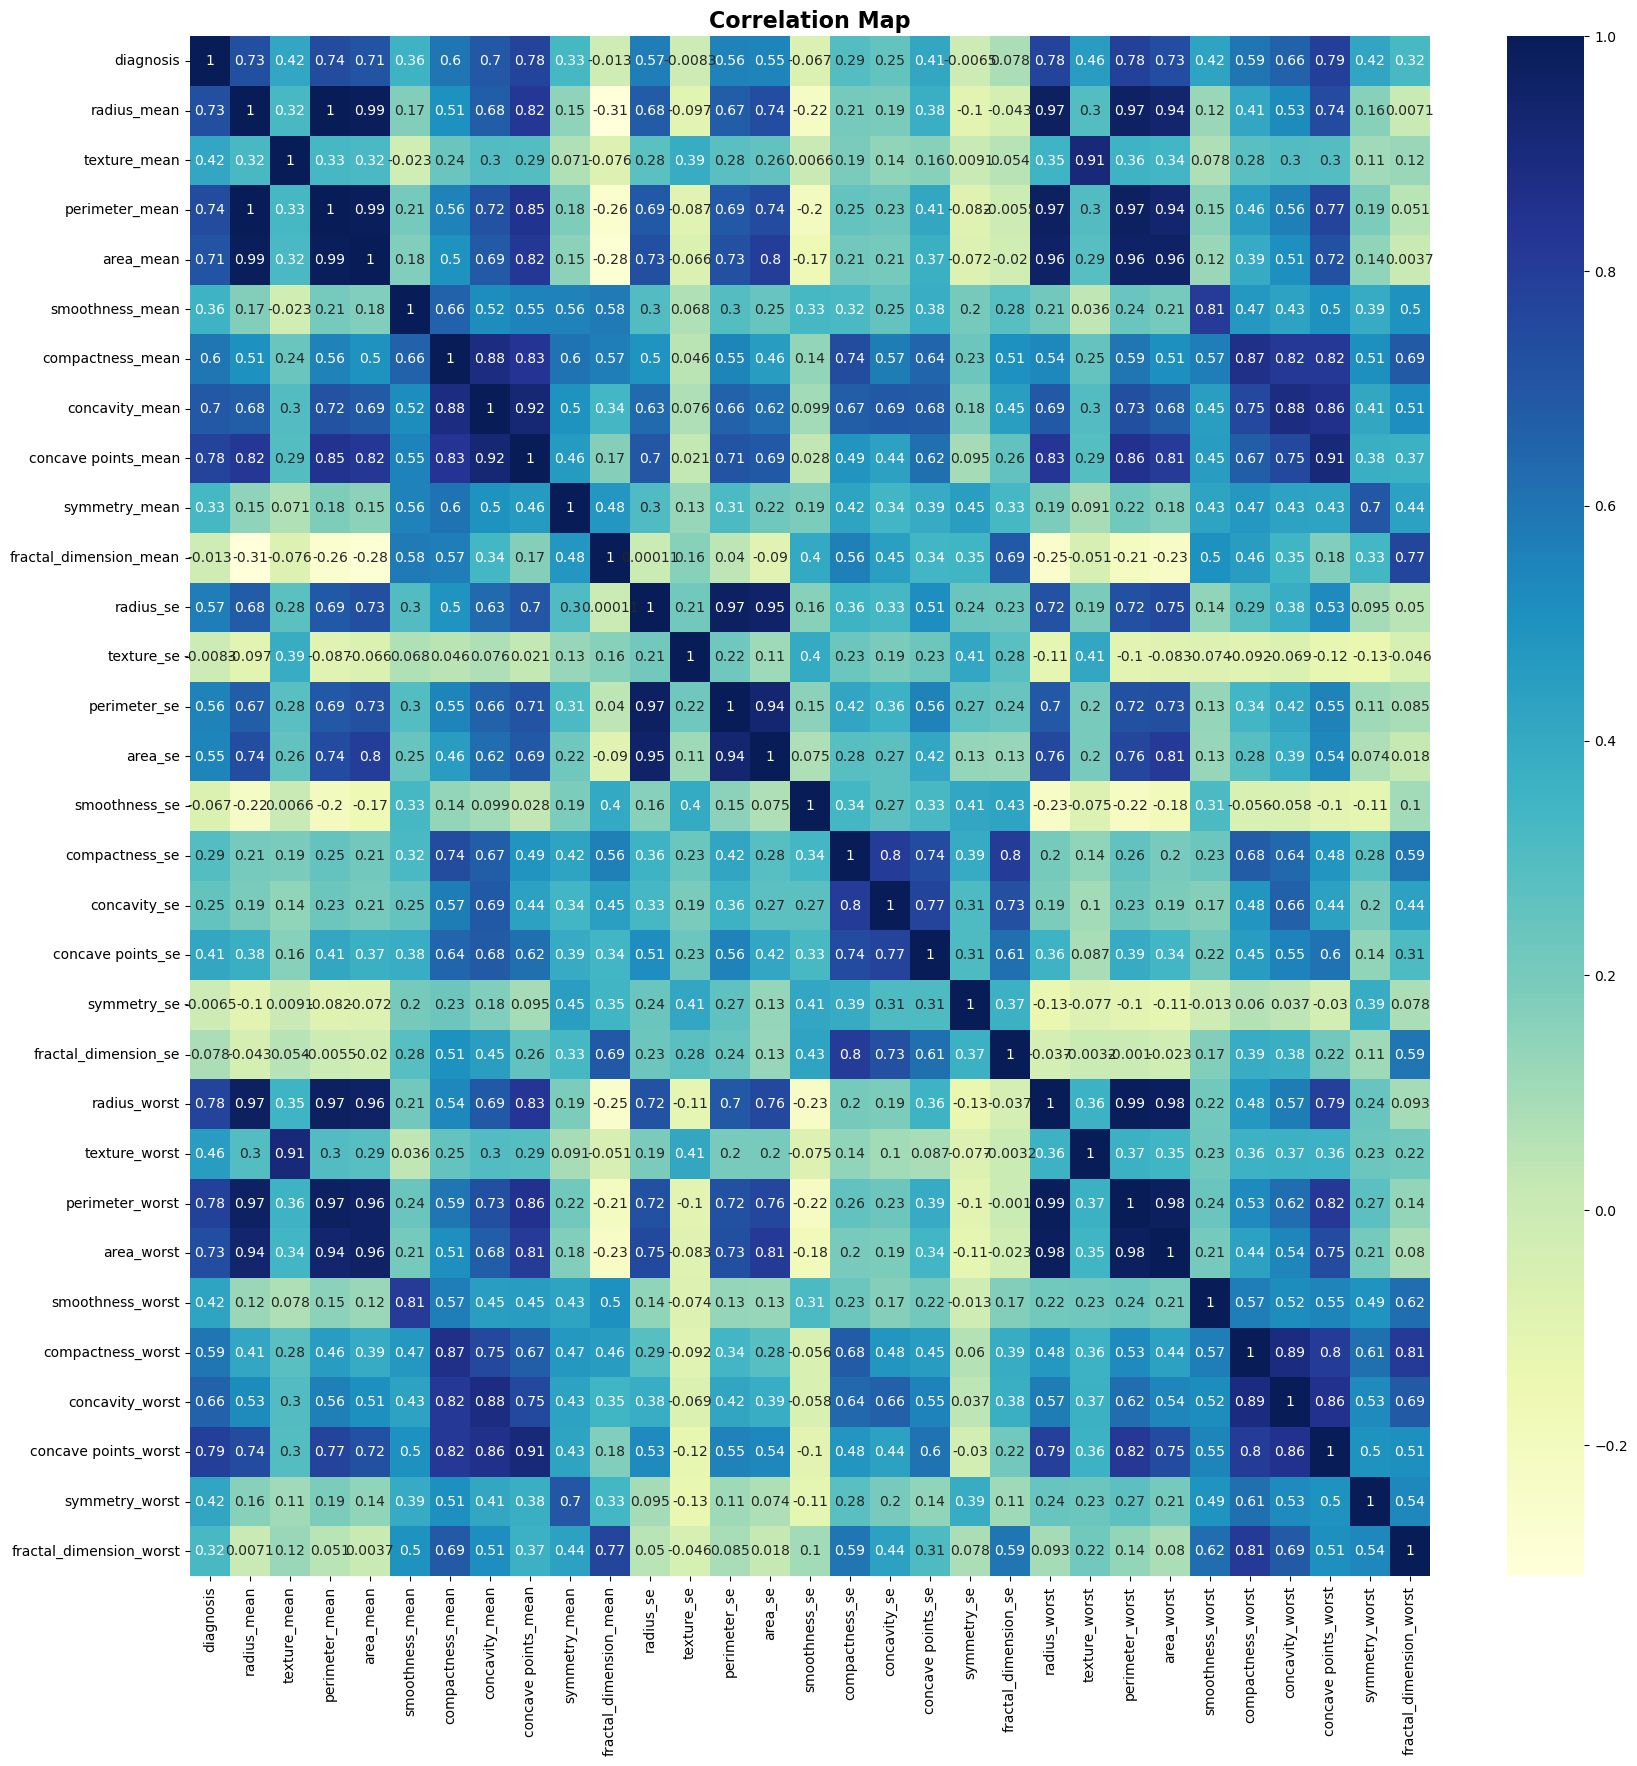

In [48]:
corr = df.corr()
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), cmap='YlGnBu', annot = True)
plt.title("Correlation Map", fontweight = "bold", fontsize=16)

Güçlü ilişkileri daha iyi görebilmek için korelasyon matrisini oluşturdum.


**diagnosis** değişkeni ile yüksek korelasyona sahip olan diğer değişkenlerin hangileri olduğunu belirler. Bu, veri setindeki değişkenler arasındaki güçlü ilişkileri incelemek ve model oluşturma sürecinde kullanılacak önemli özellikleri tanımlamak için bir yol sağlar.

Bu sebeple corr adlı korelasyon matrisinde 'diagnosis' değişkeni ile mutlak değeri 0.59'dan büyük olan korelasyon değerlerine sahip değişkenlerin indekslerini döndürecek işlemi yapalım


In [49]:
corr[abs(corr['diagnosis']) > 0.59].index

Index(['diagnosis', 'radius_mean', 'perimeter_mean', 'area_mean',
       'compactness_mean', 'concavity_mean', 'concave points_mean',
       'radius_worst', 'perimeter_worst', 'area_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst'],
      dtype='object')

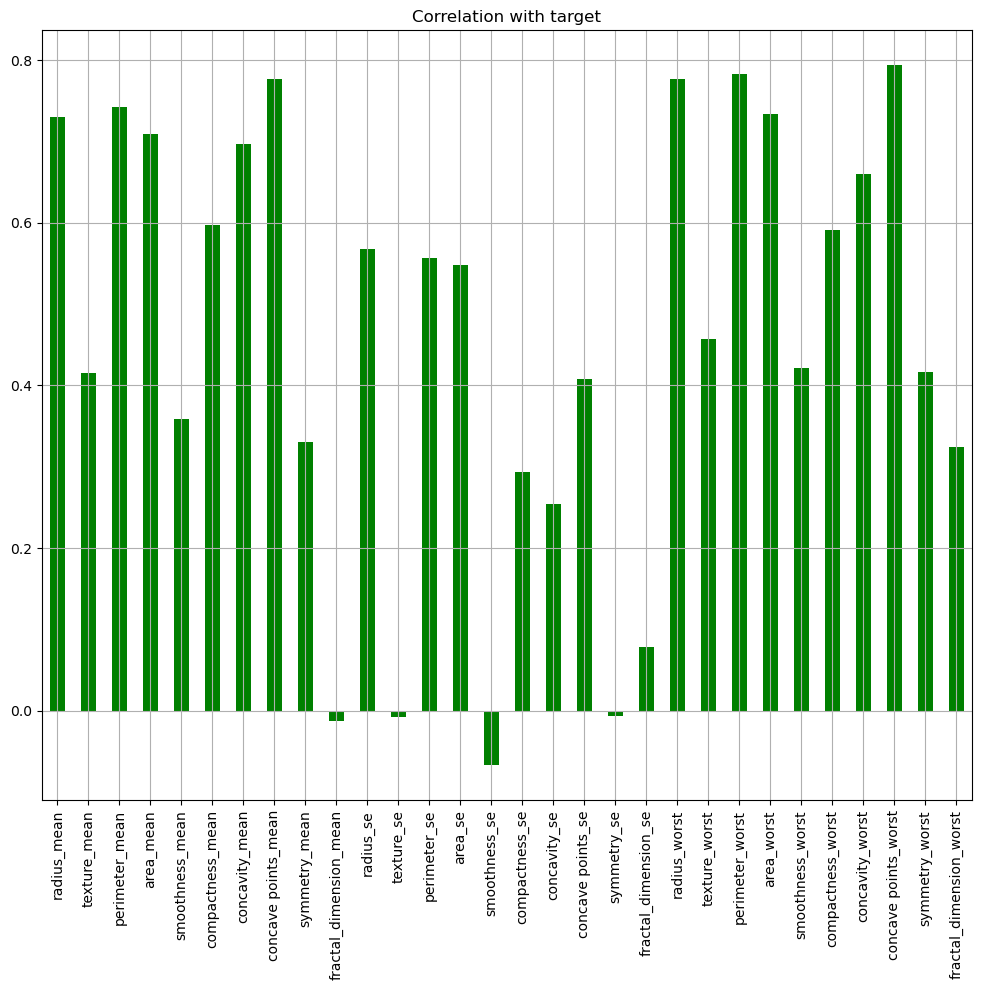

In [50]:
df.drop('diagnosis', axis=1).corrwith(df.diagnosis).plot(kind='bar', grid=True, figsize=(12, 10), title="Correlation with target",color="green");

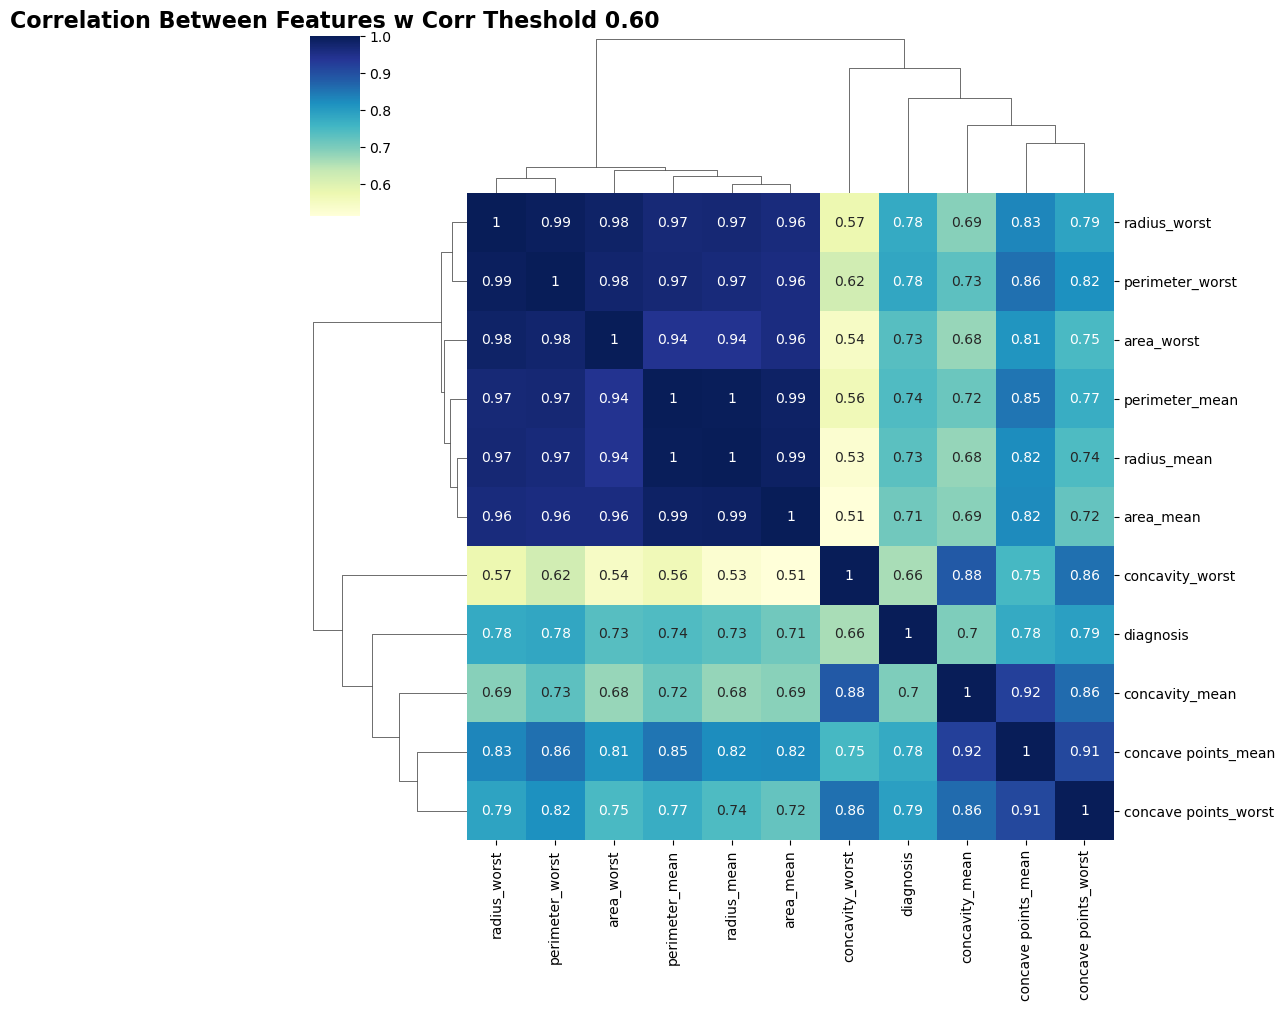

In [51]:
corr_matrix = df.corr()
threshold = 0.60 
filtre = np.abs(corr_matrix["diagnosis"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(df[corr_features].corr(), annot = True, cmap="YlGnBu")
plt.title("Correlation Between Features w Corr Theshold 0.60", fontweight = "bold", fontsize=16)
plt.show()

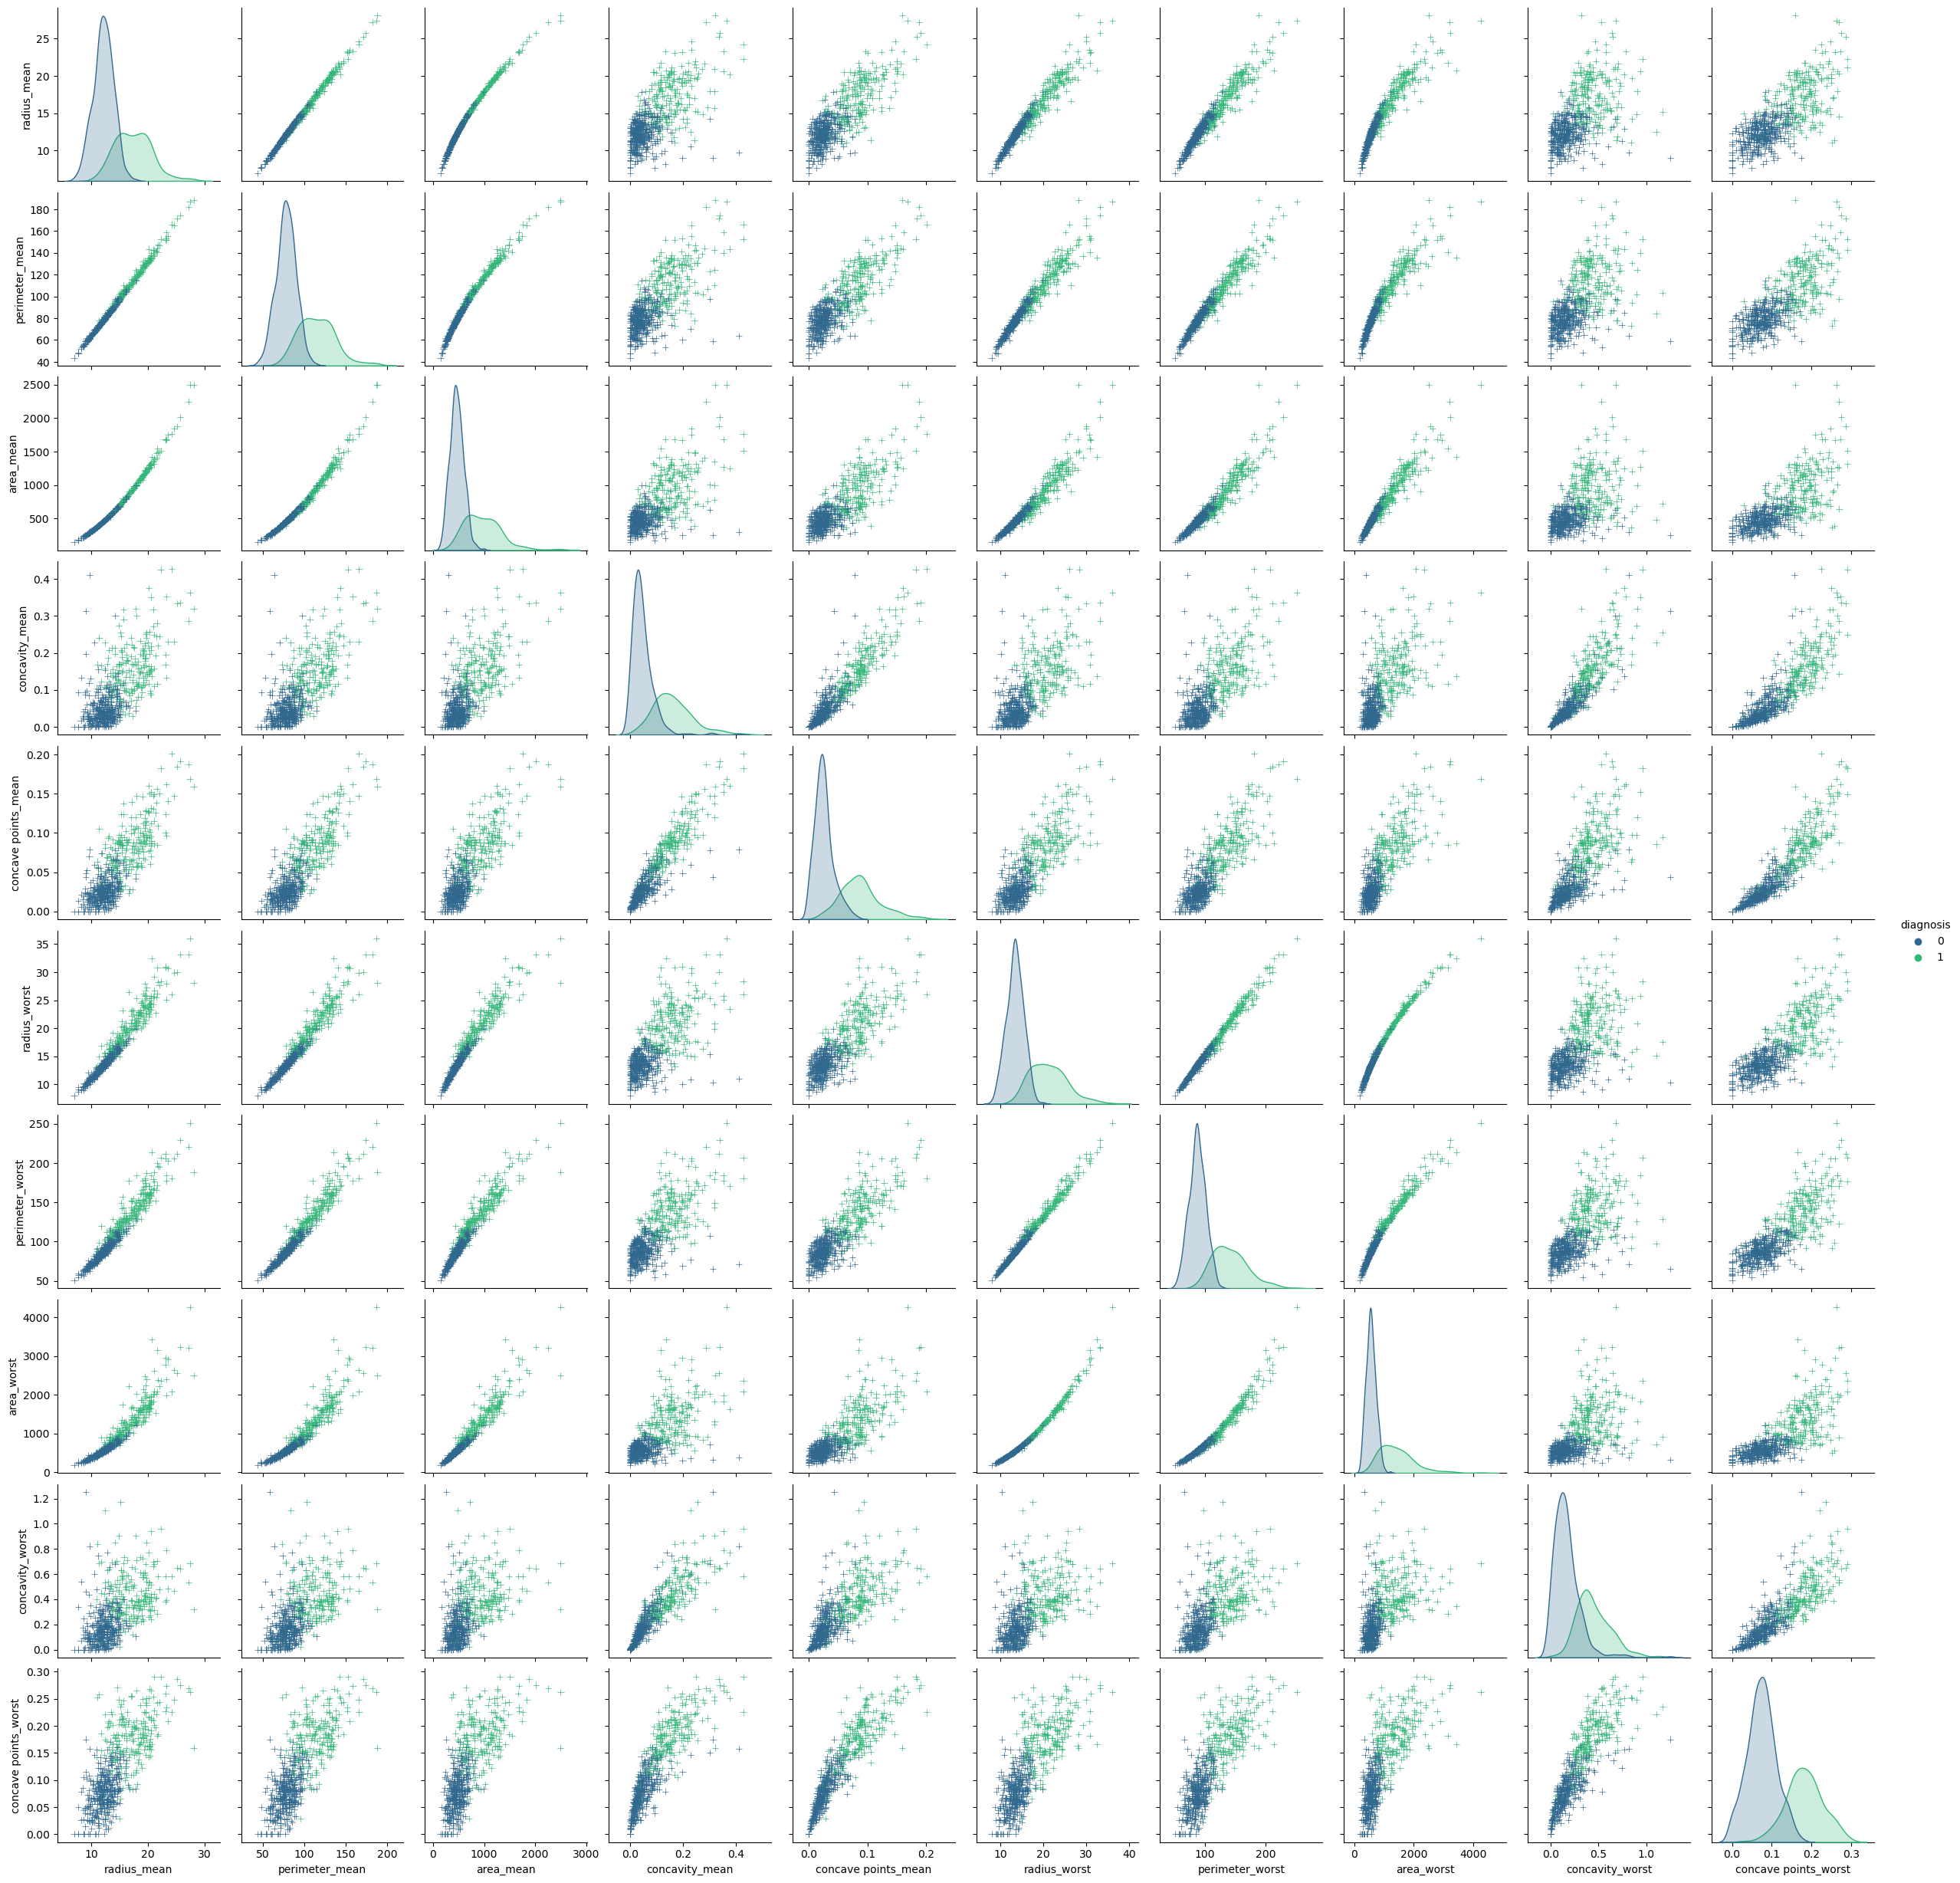

In [52]:
#pair plot
sns.pairplot(df[corr_features], diag_kind = "kde", markers = "+", hue = "diagnosis", palette='viridis')
plt.show()

In [53]:
from sklearn.neighbors import LocalOutlierFactor

# split the data to X and y before Local Outlier Factorization

y=df["diagnosis"]
X=df.drop(["diagnosis"],axis=1)
columns= df.columns.tolist()

Dataseti önce hedef değişken ve özellikler olarak ayırıyoruz ve ardından Local Outlier Factor (LOF) algoritması kullanılarak aykırı değerlerin tespit edilmesi için hazırlık yapalım.

In [54]:
lof= LocalOutlierFactor()
y_pred=lof.fit_predict(X)
y_pred[0:30]
#  1 = inlier
# -1 = outlier

array([ 1,  1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1, -1,  1,  1,  1,  1,  1])

In [55]:
x_score= lof.negative_outlier_factor_
outlier_score= pd.DataFrame()
outlier_score["score"]=x_score

lofthreshold= -2.5
loffilter= outlier_score["score"]< lofthreshold
outlier_index= outlier_score[loffilter].index.tolist()

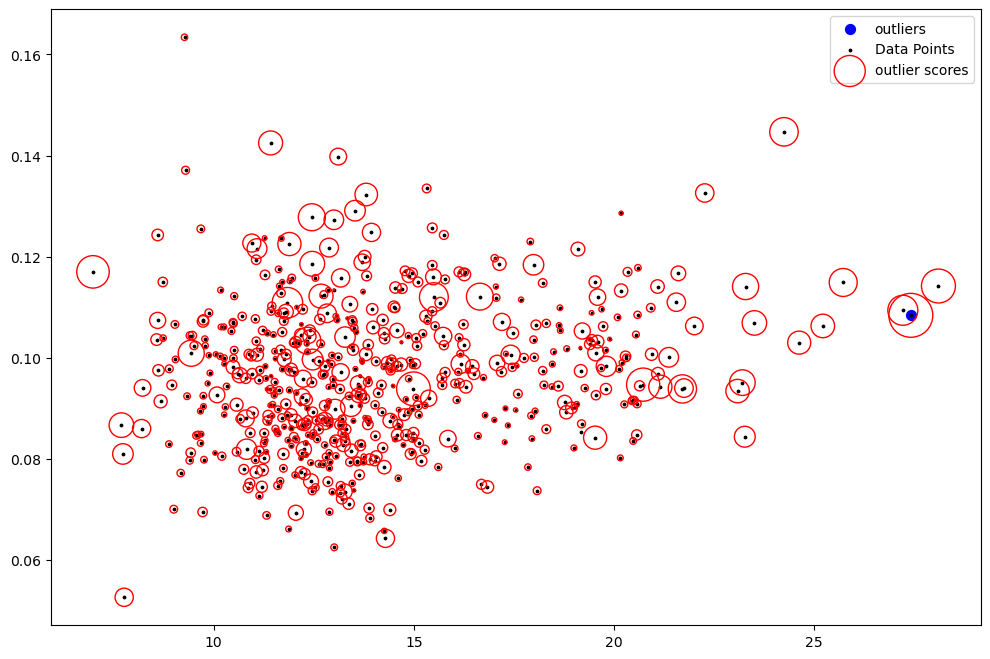

In [56]:
plt.figure(figsize=(12,8.))
plt.scatter(X.iloc[outlier_index,0],X.iloc[outlier_index,4],color="blue",s=50,label="outliers")
plt.scatter(X.iloc[:,0],X.iloc[:,4],color="k",s=3,label="Data Points")

radius=(x_score.max()- x_score)/(x_score.max()-x_score.min())
outlier_score["radius"]=radius
plt.scatter(X.iloc[:,0],X.iloc[:,4],s=1000*radius,edgecolors="r",facecolors="none",label="outlier scores")
plt.legend();

In [57]:
X= X.drop(outlier_index)
y= y.drop(outlier_index).values

Z-Score Normalization

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NeighborhoodComponentsAnalysis
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

Min-Max Normalization

In [59]:
# Min-Max normalizasyonu
scaler = MinMaxScaler()
X_normalized_minmax_train = scaler.fit_transform(X_train)
X_normalized_minmax_test = scaler.transform(X_test) 
print(X_normalized_minmax_train)

[[0.2760545  0.30334799 0.26221992 ... 0.4658926  0.25310467 0.29899966]
 [0.49122719 0.37030774 0.47718701 ... 0.71625544 0.29469742 0.25423872]
 [0.02548891 0.20696652 0.01900466 ... 0.38098694 0.26828307 0.39555782]
 ...
 [0.30521341 0.2404464  0.27382977 ... 0.12093614 0.17602996 0.05222109]
 [0.28962848 0.33513696 0.27989351 ... 0.66291727 0.31815494 0.42777213]
 [0.19913529 0.36557322 0.17710567 ... 0.2696299  0.22255076 0.11648016]]


In [60]:
key = ['LogisticRegression','KNeighborsClassifier','SVC','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 2, weights ='uniform'), SVC(kernel="rbf",random_state=15), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=20), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=2),
 'SVC': SVC(random_state=15),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(random_state=20),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
         

In [61]:
# norm yok
# alt satırda detaylı çıktı var
X_train_no_norm,X_test_no_norm,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

predicted_no_norm =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train_no_norm,y_train)
    predict = model.predict(X_test_no_norm)
    acc = accuracy_score(y_test, predict)
    predicted_no_norm.append(acc)
    print(name,acc)

LogisticRegression 0.9590643274853801
KNeighborsClassifier 0.9590643274853801
SVC 0.9532163742690059
DecisionTreeClassifier 0.9005847953216374
RandomForestClassifier 0.9649122807017544
GradientBoostingClassifier 0.9766081871345029
AdaBoostClassifier 0.9590643274853801
XGBClassifier 0.9766081871345029


LogisticRegression Accuracy: 0.9590643274853801


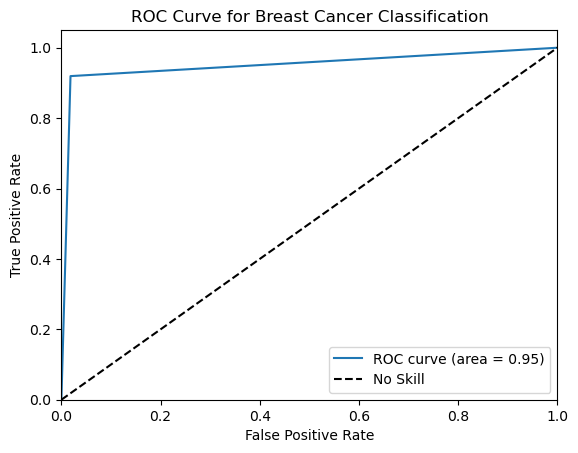

Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       109
           1       0.97      0.92      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



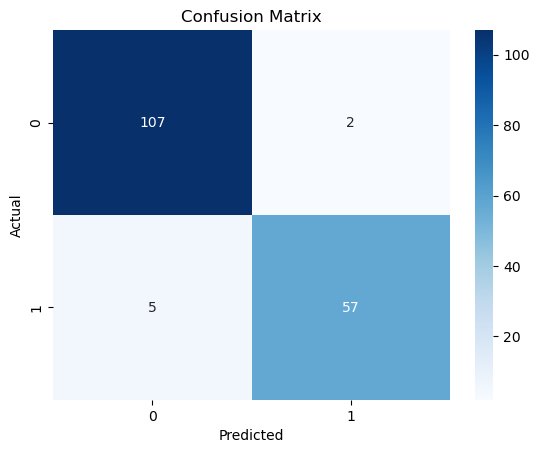

KNeighborsClassifier Accuracy: 0.9590643274853801


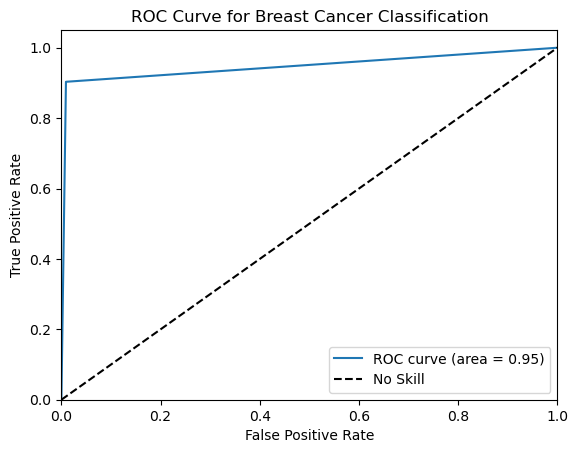

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       109
           1       0.98      0.90      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.95       171
weighted avg       0.96      0.96      0.96       171



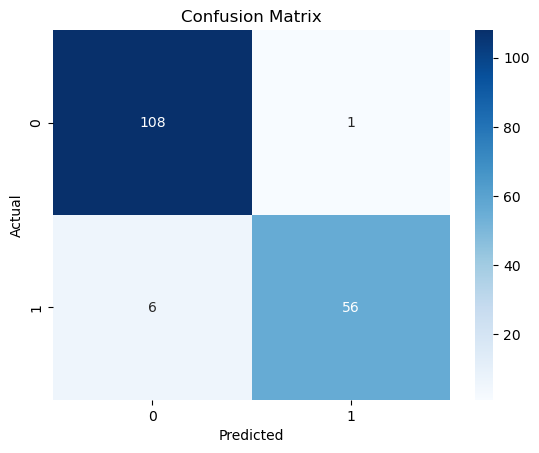

SVC Accuracy: 0.9532163742690059


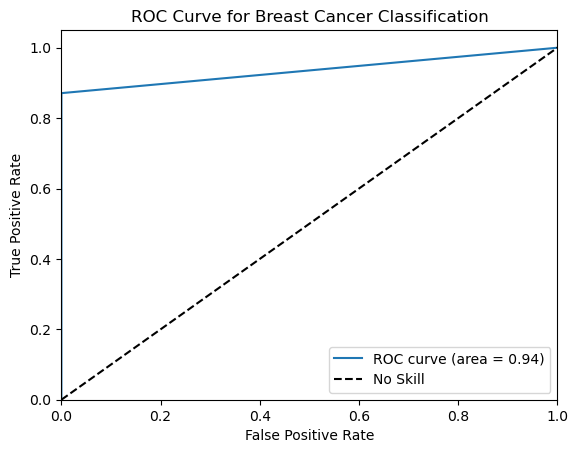

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.93      1.00      0.96       109
           1       1.00      0.87      0.93        62

    accuracy                           0.95       171
   macro avg       0.97      0.94      0.95       171
weighted avg       0.96      0.95      0.95       171



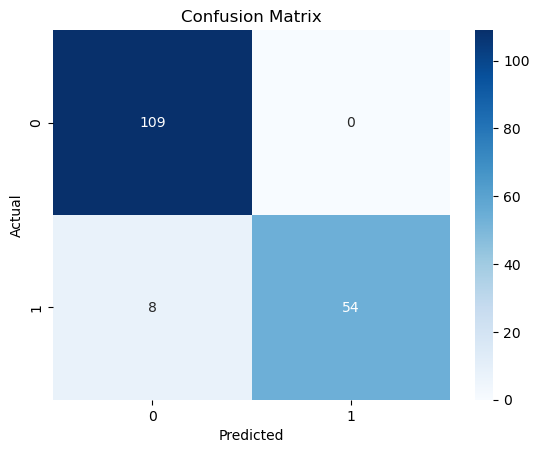

DecisionTreeClassifier Accuracy: 0.9005847953216374


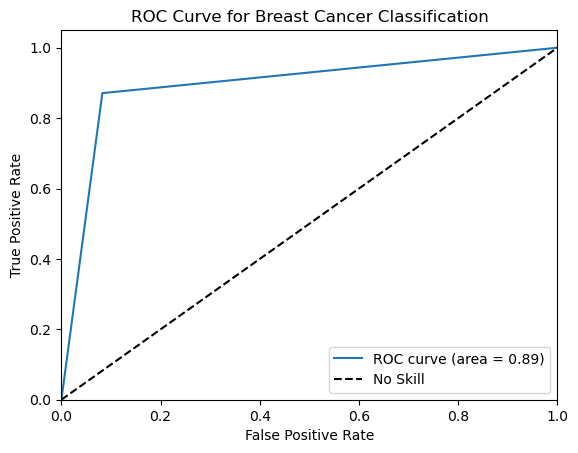

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       109
           1       0.86      0.87      0.86        62

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



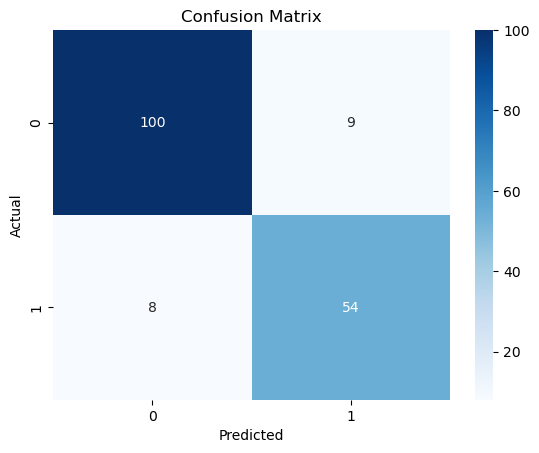

RandomForestClassifier Accuracy: 0.9649122807017544


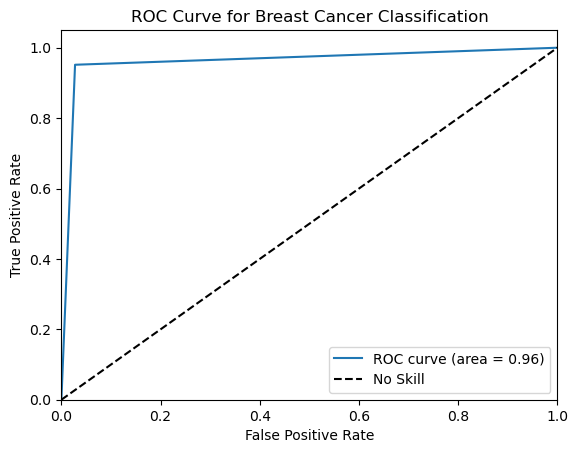

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



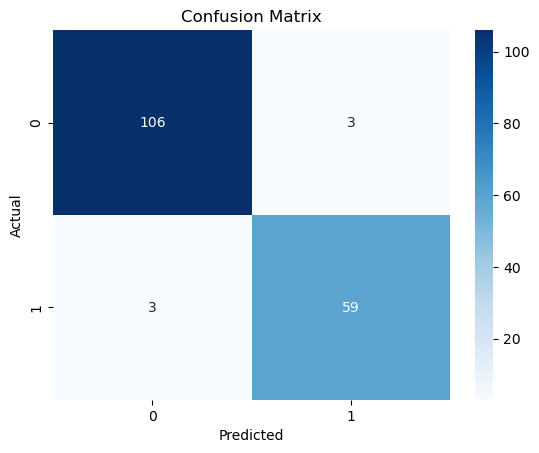

GradientBoostingClassifier Accuracy: 0.9766081871345029


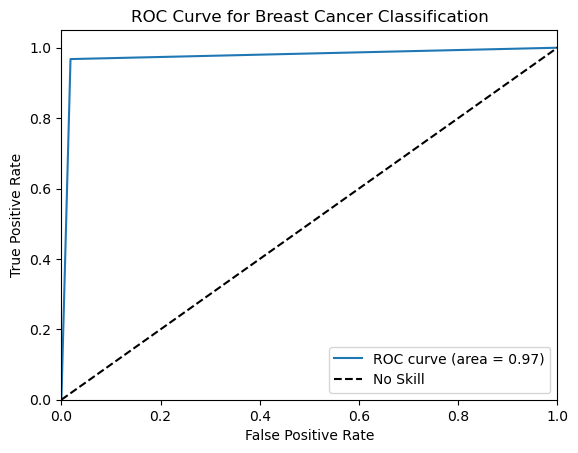

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



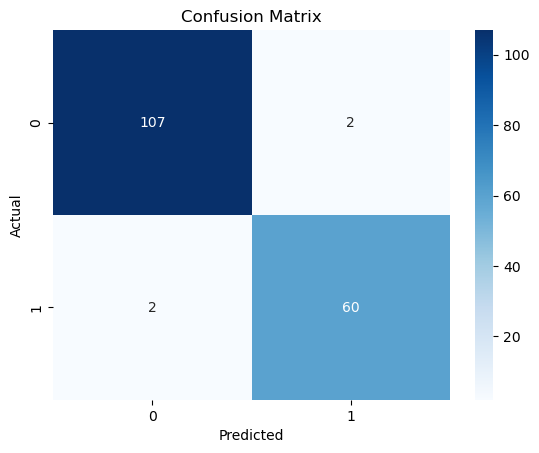

AdaBoostClassifier Accuracy: 0.9590643274853801


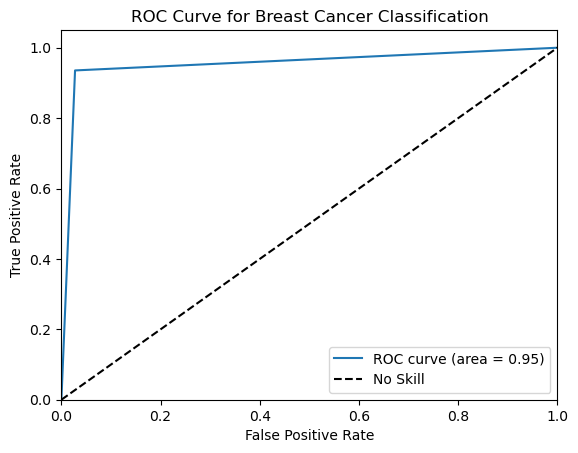

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       109
           1       0.95      0.94      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



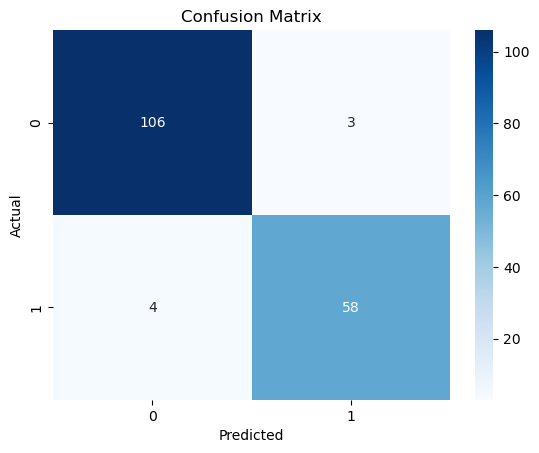

XGBClassifier Accuracy: 0.9766081871345029


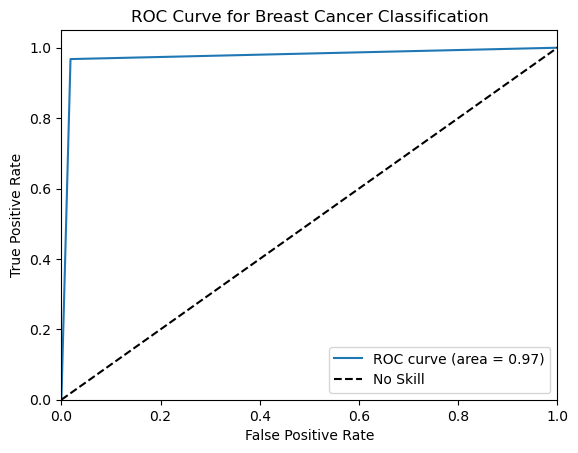

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



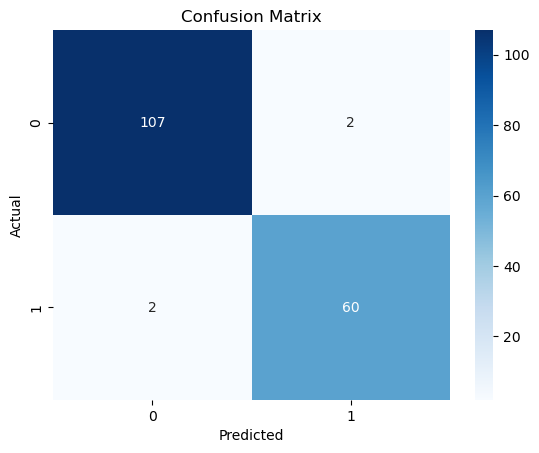

In [62]:
from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix

# Model performansını değerlendirme
predicted_no_norm = []
roc_auc_scores = {}
classification_reports = {}
confusion_matrices = {}

# Normsuz verilerle eğitim ve test
for name, algo in models.items():
    model = algo
    model.fit(X_train_no_norm, y_train)
    y_pred = model.predict(X_test_no_norm)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    predicted_no_norm.append(acc)
    print(name, "Accuracy:", acc)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    
    roc_auc_scores[name] = roc_auc
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Breast Cancer Classification')
    plt.legend()
    plt.show()

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    classification_reports[name] = class_report
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = conf_matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()
    

In [63]:
# z score norm
# alt satırda detaylı çıktı var
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)

LogisticRegression 0.9824561403508771
KNeighborsClassifier 0.9532163742690059
SVC 0.9649122807017544
DecisionTreeClassifier 0.9005847953216374
RandomForestClassifier 0.9649122807017544
GradientBoostingClassifier 0.9766081871345029
AdaBoostClassifier 0.9590643274853801
XGBClassifier 0.9766081871345029


LogisticRegression Accuracy: 0.9824561403508771


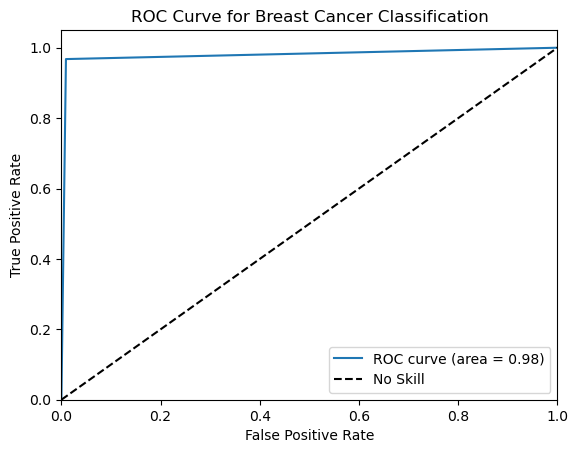

Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.98      0.99      0.99       109
           1       0.98      0.97      0.98        62

    accuracy                           0.98       171
   macro avg       0.98      0.98      0.98       171
weighted avg       0.98      0.98      0.98       171



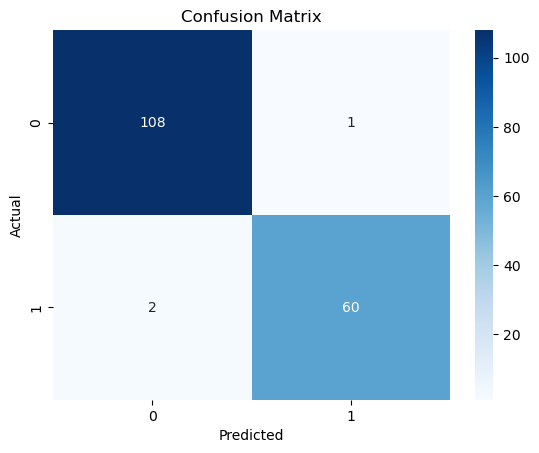

KNeighborsClassifier Accuracy: 0.9532163742690059


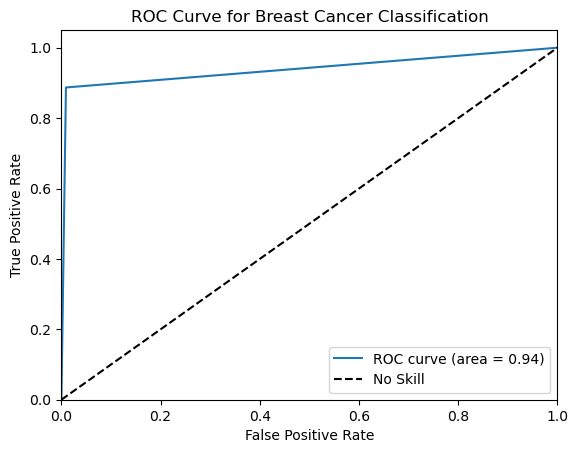

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.94      0.99      0.96       109
           1       0.98      0.89      0.93        62

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



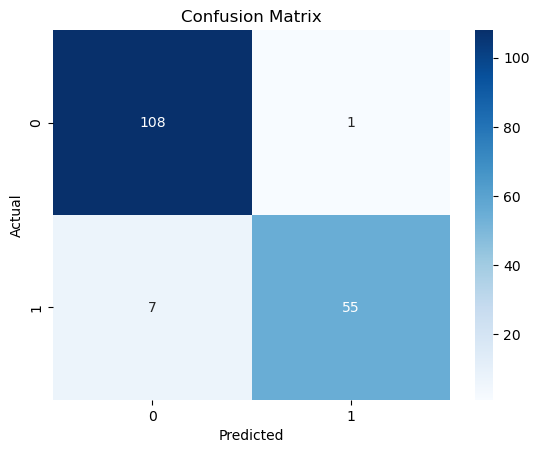

SVC Accuracy: 0.9649122807017544


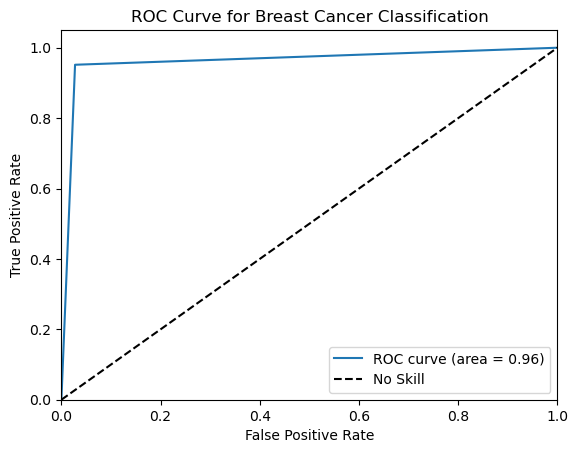

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



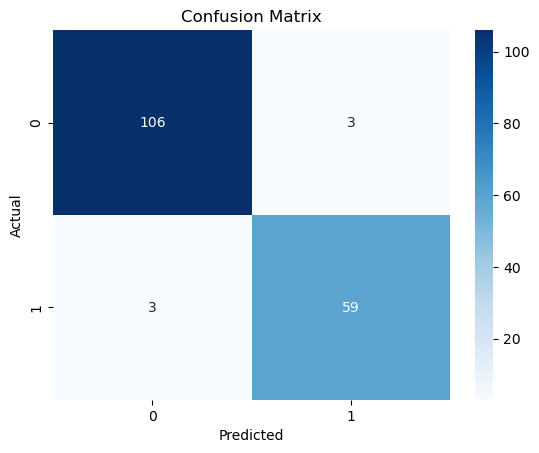

DecisionTreeClassifier Accuracy: 0.9005847953216374


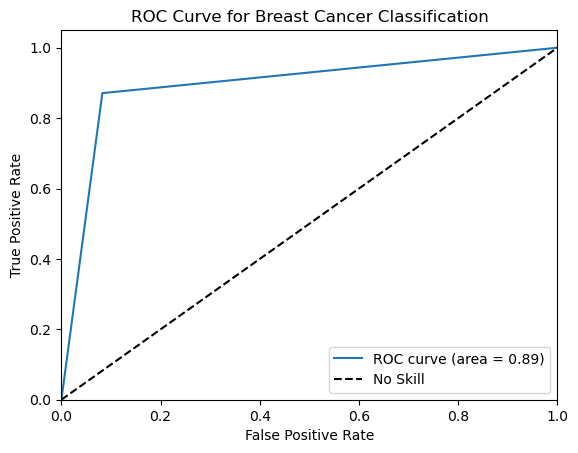

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       109
           1       0.86      0.87      0.86        62

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



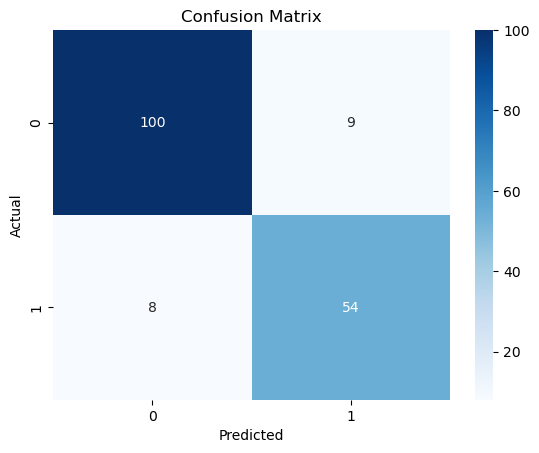

RandomForestClassifier Accuracy: 0.9649122807017544


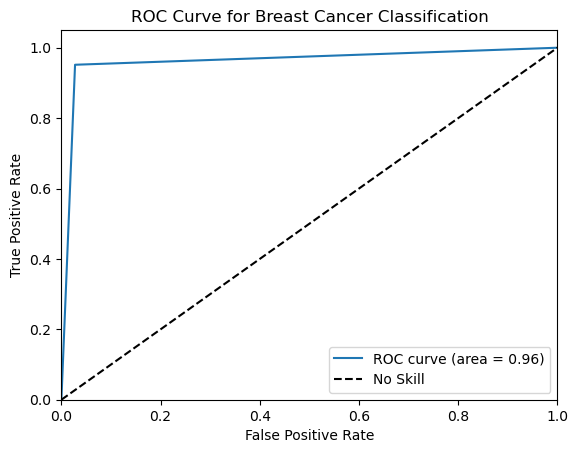

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



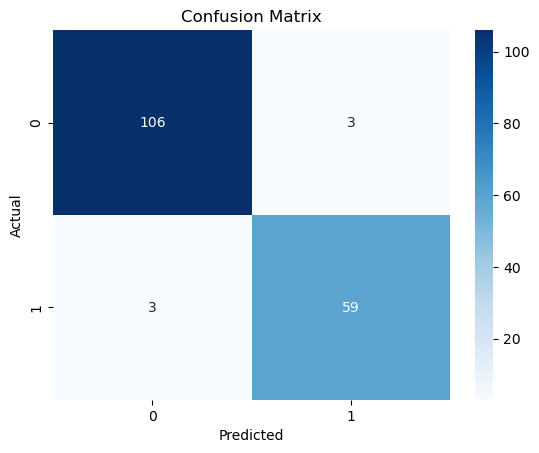

GradientBoostingClassifier Accuracy: 0.9766081871345029


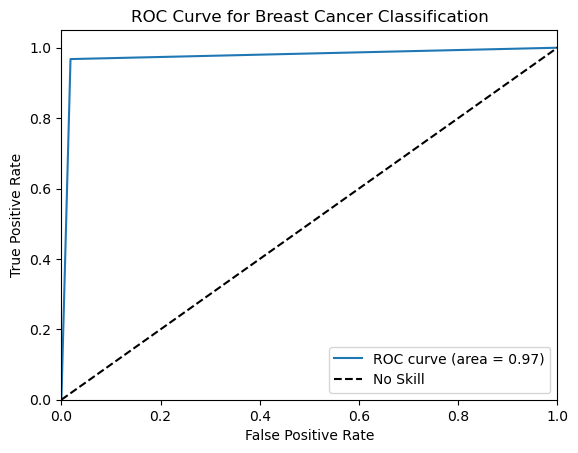

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



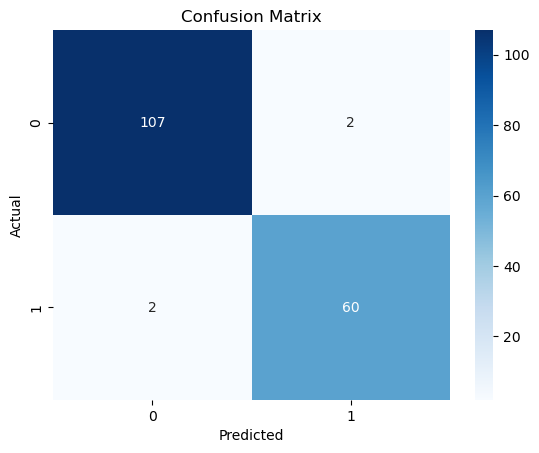

AdaBoostClassifier Accuracy: 0.9590643274853801


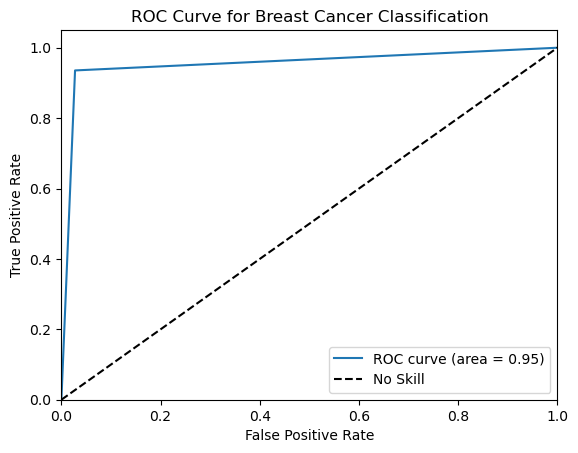

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       109
           1       0.95      0.94      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



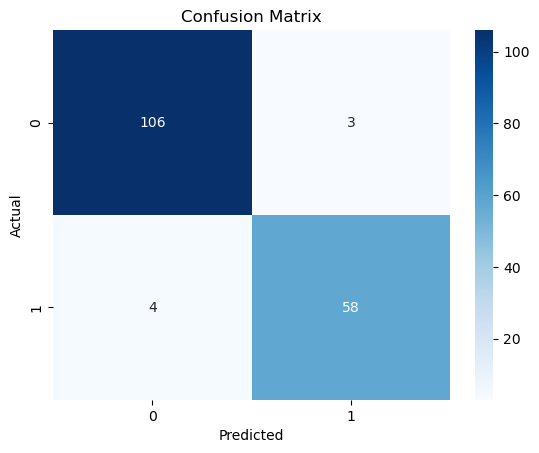

XGBClassifier Accuracy: 0.9766081871345029


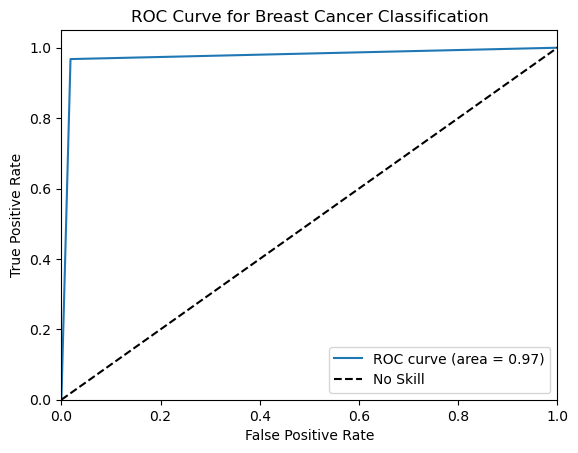

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



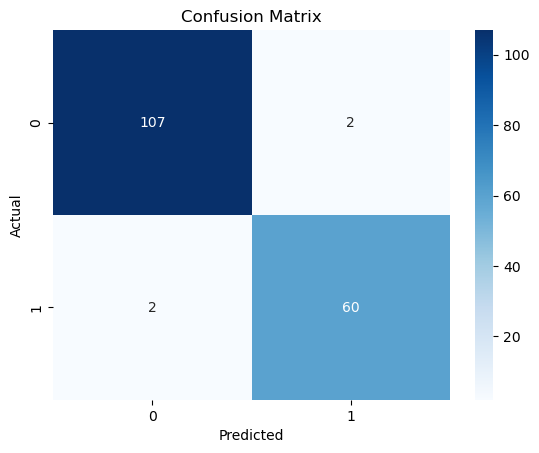

In [64]:

# Model performansını değerlendirme
predicted = []
roc_auc_scores = {}
classification_reports = {}
confusion_matrices = {}

# z score norm verilerle eğitim ve test
for name, algo in models.items():
    model = algo
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    predicted.append(acc)
    print(name, "Accuracy:", acc)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    
    roc_auc_scores[name] = roc_auc
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Breast Cancer Classification')
    plt.legend()
    plt.show()

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    classification_reports[name] = class_report
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = conf_matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

In [65]:
# minmax normalizasyonu uygulanmış data kullanıldı
# alt satırda detaylı çıktı var
predicted_minmax_norm =[]
for name,algo in models.items():
    model=algo
    model.fit(X_normalized_minmax_train,y_train)
    predict = model.predict(X_normalized_minmax_test)
    acc = accuracy_score(y_test, predict)
    predicted_minmax_norm.append(acc)
    print(name,acc)

LogisticRegression 0.9766081871345029
KNeighborsClassifier 0.9649122807017544
SVC 0.9766081871345029
DecisionTreeClassifier 0.9005847953216374
RandomForestClassifier 0.9649122807017544
GradientBoostingClassifier 0.9766081871345029
AdaBoostClassifier 0.9590643274853801
XGBClassifier 0.9766081871345029


LogisticRegression Accuracy: 0.9766081871345029


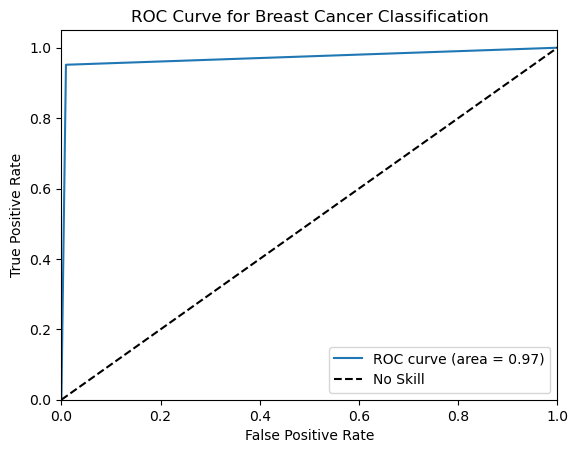

Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



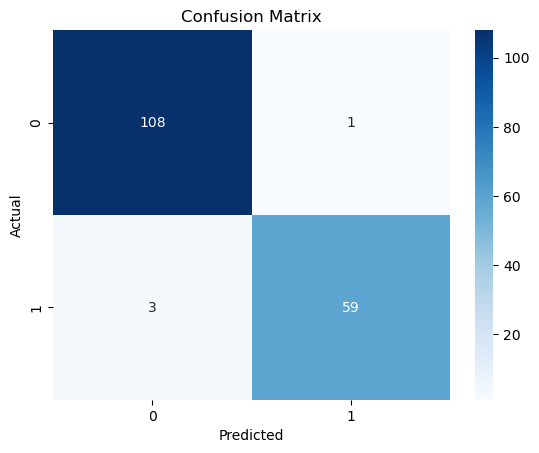

KNeighborsClassifier Accuracy: 0.9649122807017544


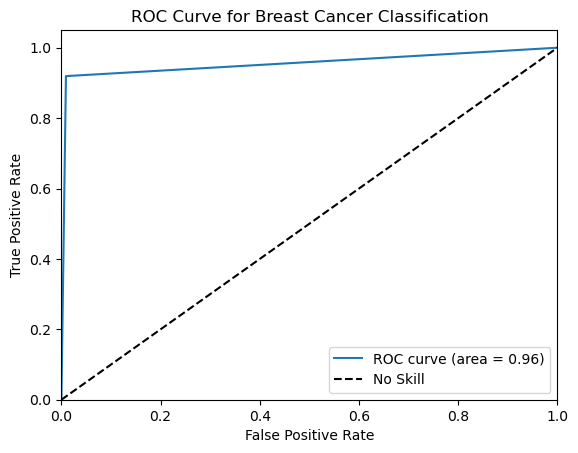

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.98      0.92      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



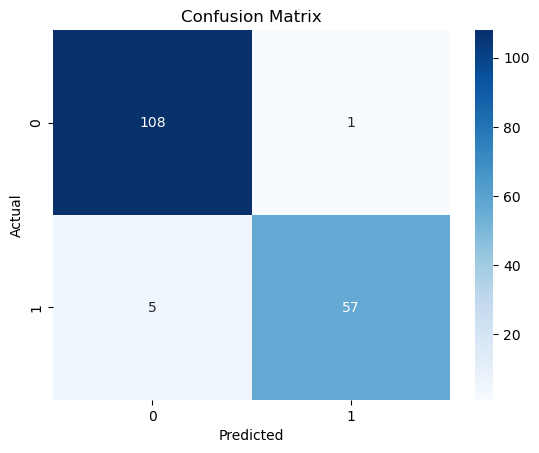

SVC Accuracy: 0.9766081871345029


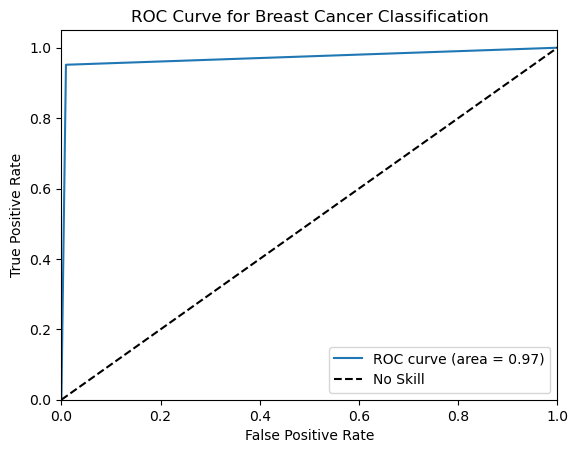

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



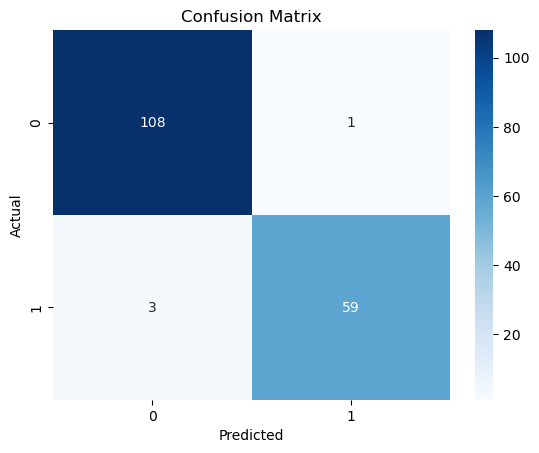

DecisionTreeClassifier Accuracy: 0.9005847953216374


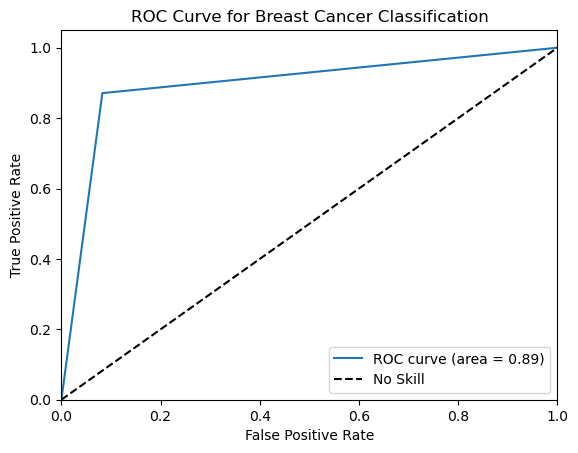

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       109
           1       0.86      0.87      0.86        62

    accuracy                           0.90       171
   macro avg       0.89      0.89      0.89       171
weighted avg       0.90      0.90      0.90       171



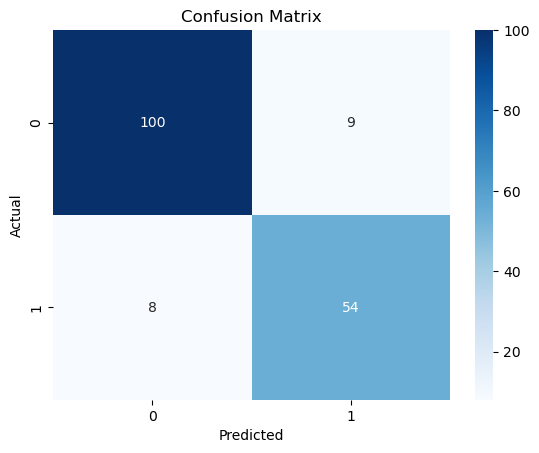

RandomForestClassifier Accuracy: 0.9649122807017544


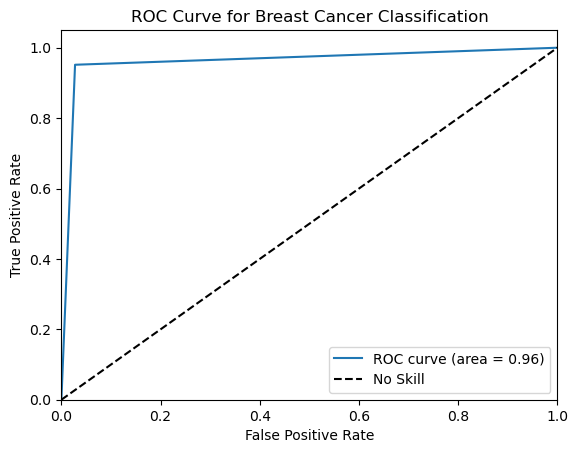

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       109
           1       0.95      0.95      0.95        62

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171



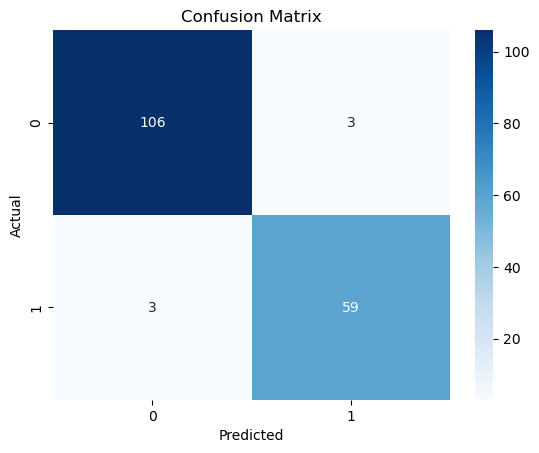

GradientBoostingClassifier Accuracy: 0.9766081871345029


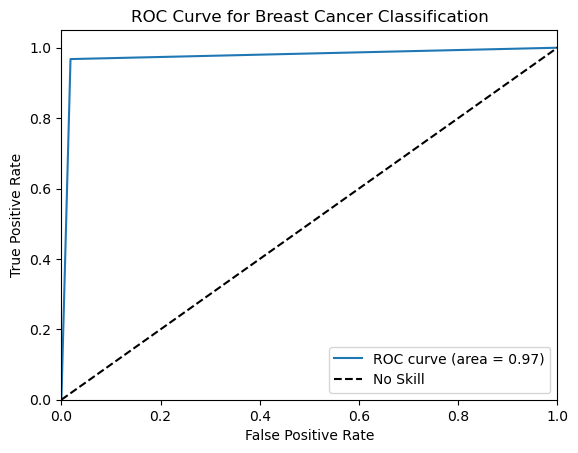

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



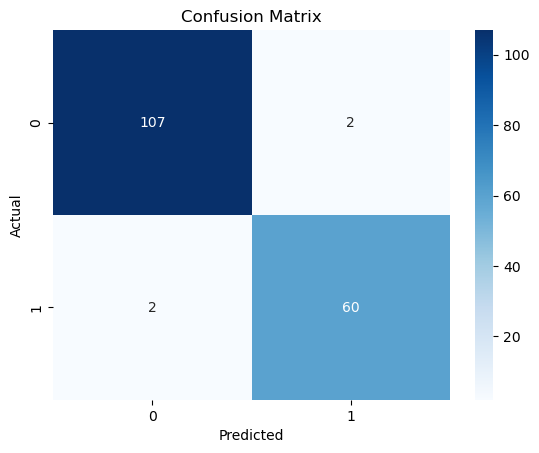

AdaBoostClassifier Accuracy: 0.9590643274853801


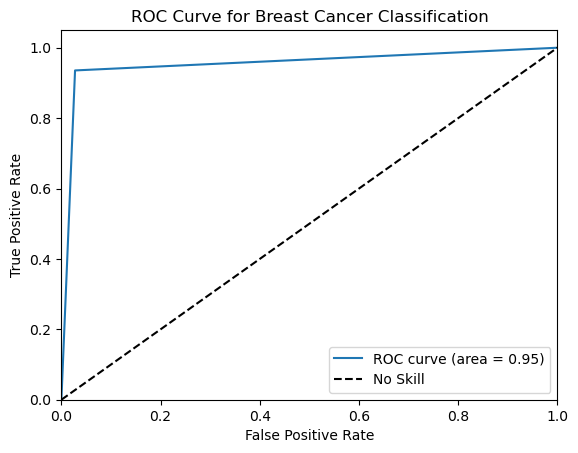

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.96      0.97      0.97       109
           1       0.95      0.94      0.94        62

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



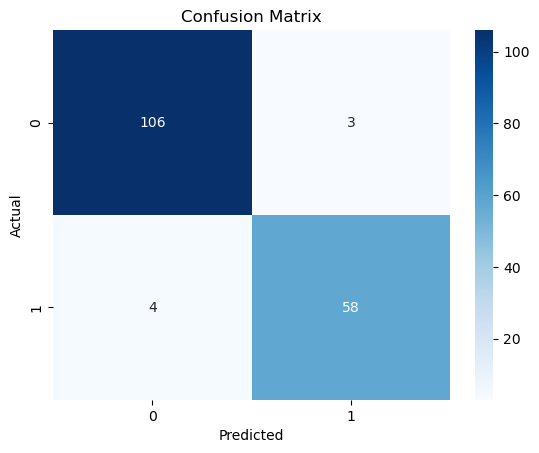

XGBClassifier Accuracy: 0.9766081871345029


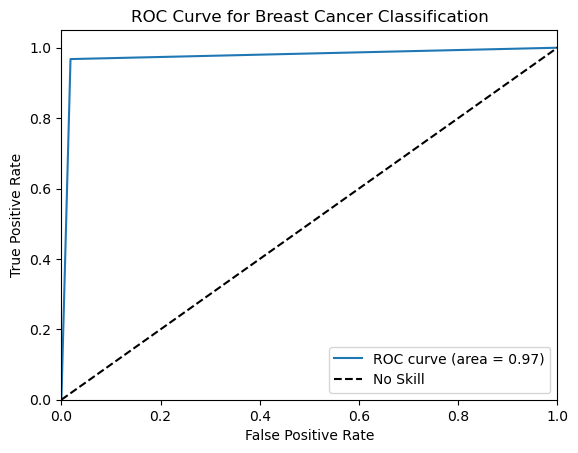

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



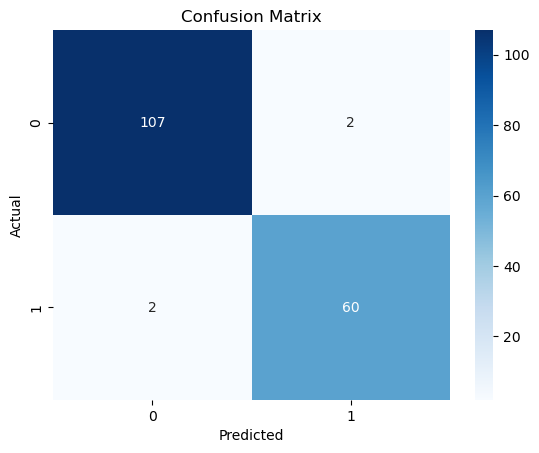

In [66]:
# Model performansını değerlendirme
predicted_minmax_norm = []
roc_auc_scores = {}
classification_reports = {}
confusion_matrices = {}

# minmax norm verilerle eğitim ve test
for name, algo in models.items():
    model = algo
    model.fit(X_normalized_minmax_train, y_train)
    y_pred = model.predict(X_normalized_minmax_test)
    
    # Accuracy
    acc = accuracy_score(y_test, y_pred)
    predicted_minmax_norm.append(acc)
    print(name, "Accuracy:", acc)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    
    roc_auc_scores[name] = roc_auc
    
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Breast Cancer Classification')
    plt.legend()
    plt.show()

    # Classification Report
    class_report = classification_report(y_test, y_pred)
    classification_reports[name] = class_report
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Confusion Matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    confusion_matrices[name] = conf_matrix
    
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

Text(0.5, 1.0, 'Plotting the Model Accuracies')

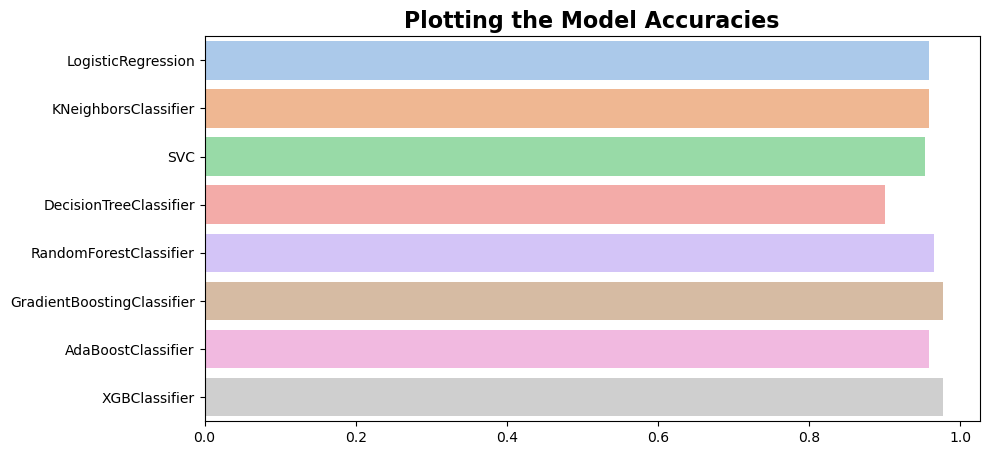

In [67]:
# norm yok
plt.figure(figsize = (10,5))
sns.barplot(x = predicted_no_norm, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model Accuracies')

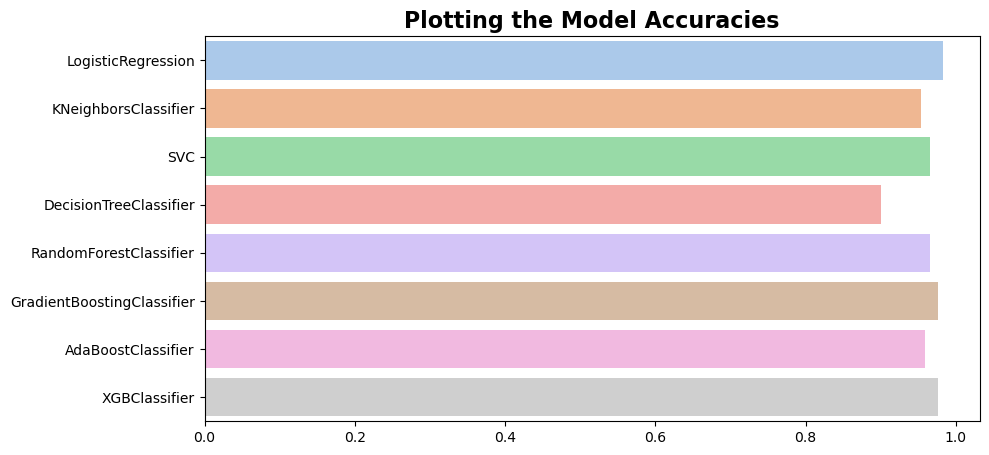

In [68]:
# z score normalizasyonu uygulanmış data kullanıldı
plt.figure(figsize = (10,5))
sns.barplot(x = predicted, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

Text(0.5, 1.0, 'Plotting the Model Accuracies')

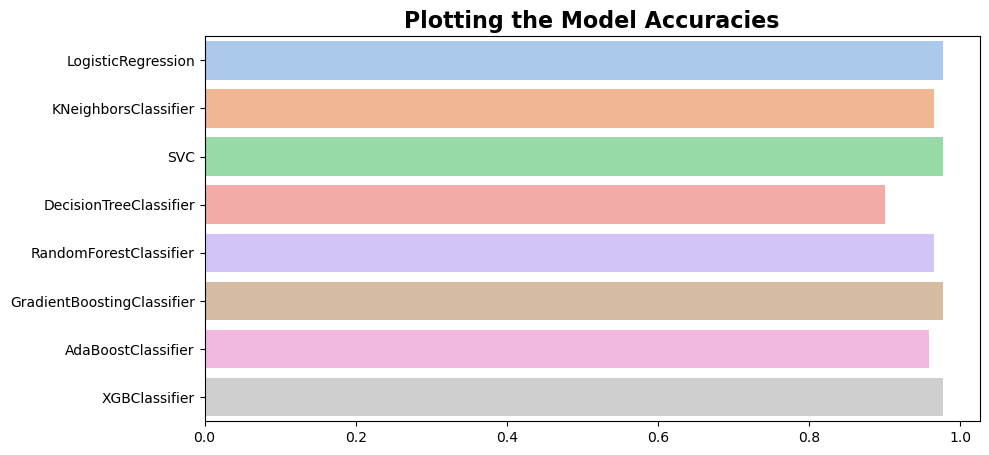

In [69]:
# minmax normalizasyonu uygulanmış data kullanıldı
plt.figure(figsize = (10,5))
sns.barplot(x = predicted_minmax_norm, y = key, palette='pastel')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")

<h3 style = "font-family: Comic Sans MS;background-color:#ff99cc	"> Observations: </h3>
We can clearly see that all our models perform with more than 90% accuracy where DecisionTreeClassifier has the lowest of 90.058% and LogisticRegression has the highest of 98.25% accuracy.

Let us see if we can further improve the accuracy of our model by adding a few changes to it!


In [ ]:
# normalizasyon yok
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs = []
acc = []

for i in range(1,25,1):
    # test_size 0.2 idi 0.3 yaptım yukardakilerle aynı olsun diye
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = i)  
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc.append(accuracy_score(y_test, predict_values_lr_rs))
    rs.append(i)

1 0.9532163742690059
2 0.9415204678362573
3 0.9532163742690059
4 0.9473684210526315
5 0.9766081871345029
6 0.9473684210526315
7 0.9649122807017544
8 0.9415204678362573
9 0.9473684210526315
10 0.9415204678362573
11 0.9473684210526315
12 0.9415204678362573
13 0.9298245614035088
14 0.9590643274853801
15 0.9239766081871345
16 0.9532163742690059
17 0.9473684210526315
18 0.9473684210526315
19 0.9590643274853801
20 0.9649122807017544
21 0.9473684210526315
22 0.9298245614035088
23 0.9590643274853801
24 0.9415204678362573


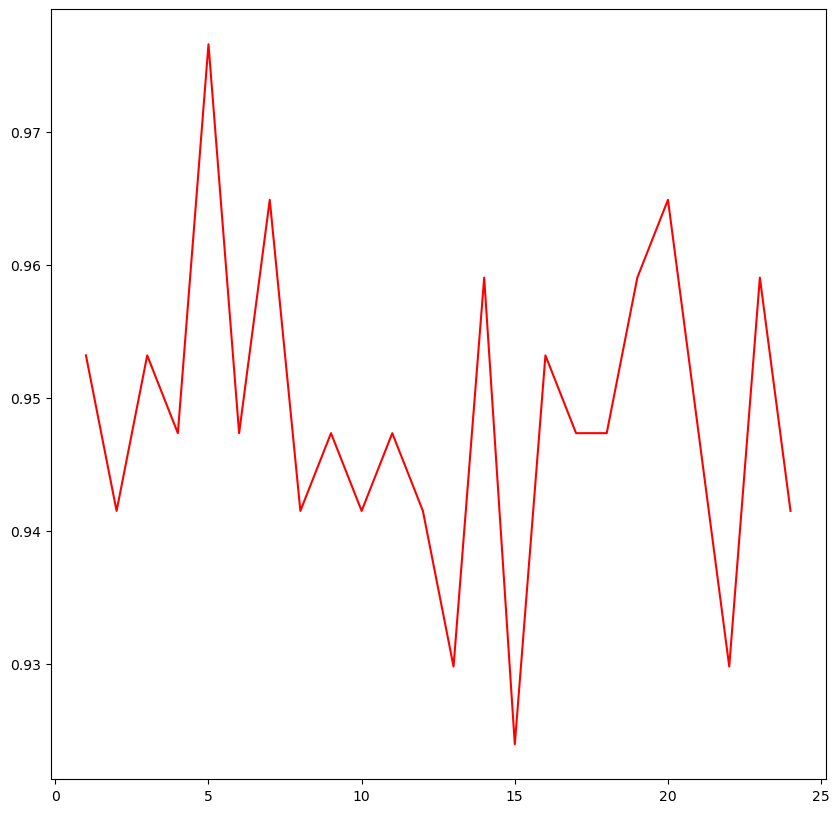

In [72]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs)):
    print(rs[i],acc[i])

In [ ]:
#z score normalisazyon
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs_z = []
acc_z = []

# Dont fit the scaler while standardizate X_test !
scaler = StandardScaler()

for i in range(1,25,1):

    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = i)  
    
    # z-score normalization
    X_train=scaler.fit_transform(X_train)
    X_test=scaler.transform(X_test)
    
    model_lr_rs = lr.fit(X_train, y_train)
    predict_values_lr_rs = model_lr_rs.predict(X_test)
    acc_z.append(accuracy_score(y_test, predict_values_lr_rs))
    rs_z.append(i)

1 0.9707602339181286
2 0.9590643274853801
3 0.9883040935672515
4 0.9824561403508771
5 0.9824561403508771
6 0.9883040935672515
7 0.9766081871345029
8 0.9707602339181286
9 0.9824561403508771
10 0.9649122807017544
11 0.9707602339181286
12 0.9824561403508771
13 0.9883040935672515
14 0.9883040935672515
15 0.9590643274853801
16 0.9707602339181286
17 0.9766081871345029
18 0.9883040935672515
19 0.9824561403508771
20 0.9649122807017544
21 0.9707602339181286
22 0.9532163742690059
23 0.9766081871345029
24 0.9766081871345029


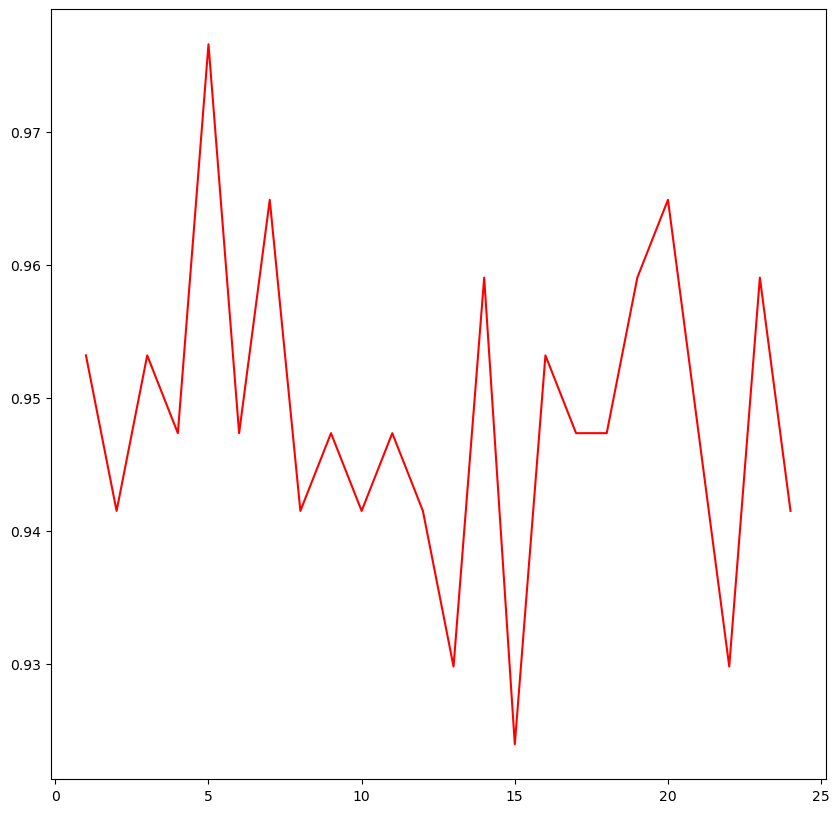

In [75]:
plt.figure(figsize=(10,10))
plt.plot(rs, acc, color ='red')

for i in range(len(rs_z)):
    print(rs_z[i],acc_z[i])


In [76]:
# minmax normalizasyonuna göre
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
rs_minmax = []
acc_minmax = []

scaler = MinMaxScaler()

for i in range(1,25,1):
    X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.3, random_state = i)  
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model_lr_rs_minmax = lr.fit(X_train, y_train)
    predict_values_lr_rs_minmax = model_lr_rs_minmax.predict(X_test)
    acc_minmax.append(accuracy_score(y_test, predict_values_lr_rs_minmax))
    rs_minmax.append(i)

1 0.9649122807017544
2 0.9649122807017544
3 0.9824561403508771
4 0.9824561403508771
5 0.9766081871345029
6 0.9590643274853801
7 0.9707602339181286
8 0.9707602339181286
9 0.9649122807017544
10 0.9649122807017544
11 0.9532163742690059
12 0.9590643274853801
13 0.9883040935672515
14 0.9824561403508771
15 0.9590643274853801
16 0.9707602339181286
17 0.9532163742690059
18 0.9239766081871345
19 0.935672514619883
20 0.9649122807017544
21 0.9707602339181286
22 0.9532163742690059
23 0.9707602339181286
24 0.9824561403508771


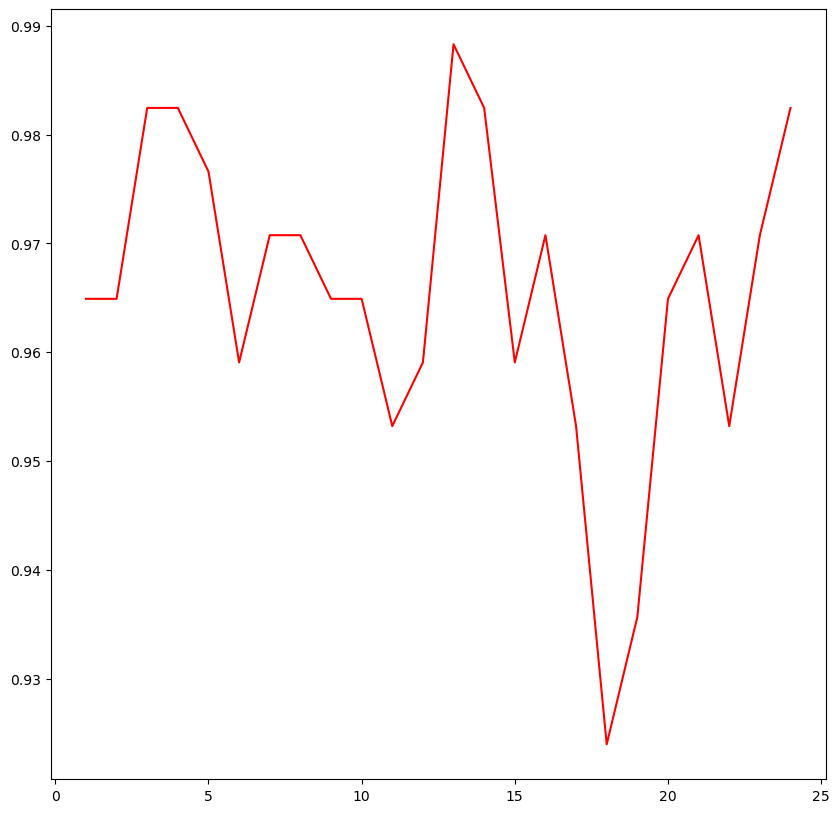

In [34]:
plt.figure(figsize=(10,10))
plt.plot(rs_minmax, acc_minmax, color ='red')

for i in range(len(rs_minmax)):
    print(rs_minmax[i],acc_minmax[i])

Yukarıdaki grafikten en yüksek doğruluğun 20 - 25. tekrarlarda elde edildiğini sonuçlayabiliriz.

In [77]:
# norm yok
for i in range(0,24):
    if acc[i] > 0.98:
        print(acc[i])  
# başarılı sonuç yok

In [78]:
# z score norm

for i in range(0,24):
    if acc_z[i] > 0.98:
        print(acc_z[i])

0.9883040935672515
0.9824561403508771
0.9824561403508771
0.9883040935672515
0.9824561403508771
0.9824561403508771
0.9883040935672515
0.9883040935672515
0.9883040935672515
0.9824561403508771


In [79]:
# minmax norm
for i in range(0,24):
    if acc_minmax[i] > 0.98:
        print(acc_minmax[i])

0.9824561403508771
0.9824561403508771
0.9883040935672515
0.9824561403508771
0.9824561403508771



KNN ile başarımı arttırmaya deneyelim. Bunun için inceleyebileceğimiz farklı yollar bulunmakta.  K komşu sayısını değiştirerek başarım oranını arttırmaya çalışacağız. Farklı k değerleriyle sonuçların değişimini inceleyeceğiz.


In [80]:

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Farklı k değerleri için KNN modeli oluşturma ve test etme
k_values = [1, 3, 5, 7, 9, 11]  # farklı k değerleri
results = {}  # sonuçları depolamak için bir sözlük

for k in k_values:
    # KNN modeli oluşturma
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Modeli eğitme
    knn.fit(X_train, y_train)
    
    # Modeli test etme
    y_pred = knn.predict(X_test)
    
    # Doğruluk skorunu hesaplama ve sonuçları sözlüğe ekleme
    accuracy = accuracy_score(y_test, y_pred)
    results[k] = accuracy

# Sonuçları yazdırma
print("K Values and Accuracy Scores:")
for k, accuracy in results.items():
    print("k =", k, ", Accuracy =", accuracy)

    

K Values and Accuracy Scores:
k = 1 , Accuracy = 0.9415204678362573
k = 3 , Accuracy = 0.9532163742690059
k = 5 , Accuracy = 0.9649122807017544
k = 7 , Accuracy = 0.9649122807017544
k = 9 , Accuracy = 0.9707602339181286
k = 11 , Accuracy = 0.9766081871345029


In [81]:
# z score normalizasyonu

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = StandardScaler()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#z score norm
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Farklı k değerleri için KNN modeli oluşturma ve test etme
k_values = [1, 3, 5, 7, 9, 11]  # farklı k değerleri
results_z = {}  # sonuçları depolamak için bir sözlük

for k in k_values:
    # KNN modeli oluşturma
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Modeli eğitme
    knn.fit(X_train, y_train)
    
    # Modeli test etme
    y_pred = knn.predict(X_test)
    
    # Doğruluk skorunu hesaplama ve sonuçları sözlüğe ekleme
    accuracy = accuracy_score(y_test, y_pred)
    results_z[k] = accuracy

# Sonuçları yazdırma
print("K Values and Accuracy Scores:")
for k, accuracy in results_z.items():
    print("k =", k, ", Accuracy =", accuracy)

K Values and Accuracy Scores:
k = 1 , Accuracy = 0.9532163742690059
k = 3 , Accuracy = 0.9532163742690059
k = 5 , Accuracy = 0.9590643274853801
k = 7 , Accuracy = 0.9649122807017544
k = 9 , Accuracy = 0.9590643274853801
k = 11 , Accuracy = 0.9590643274853801


In [45]:
# minmax, knn  de z score başarıyı düşürdü

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

scaler = MinMaxScaler()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#z score norm
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Farklı k değerleri için KNN modeli oluşturma ve test etme
k_values = [1, 3, 5, 7, 9, 11]  # farklı k değerleri
results_minmax = {}  # sonuçları depolamak için bir sözlük

for k in k_values:
    # KNN modeli oluşturma
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Modeli eğitme
    knn.fit(X_train, y_train)
    
    # Modeli test etme
    y_pred = knn.predict(X_test)
    
    # Doğruluk skorunu hesaplama ve sonuçları sözlüğe ekleme
    accuracy = accuracy_score(y_test, y_pred)
    results_minmax[k] = accuracy

# Sonuçları yazdırma
print("K Values and Accuracy Scores:")
for k, accuracy in results_minmax.items():
    print("k =", k, ", Accuracy =", accuracy)

K Values and Accuracy Scores:
k = 1 , Accuracy = 0.9649122807017544
k = 3 , Accuracy = 0.9649122807017544
k = 5 , Accuracy = 0.9707602339181286
k = 7 , Accuracy = 0.9590643274853801
k = 9 , Accuracy = 0.9590643274853801
k = 11 , Accuracy = 0.9649122807017544


Verilen sonuçlara bakıldığında, k değerinin artmasıyla birlikte doğruluk skorunun arttığı görülmektedir. Ancak, k = 11 için doğruluk skoru (0.9766) diğer k değerlerine kıyasla daha yüksektir. Bu durumda, modelin eğitim verilerine daha fazla uyum sağladığı ve daha yüksek bir başarı elde ettiği düşünülebilir. Ancak, bu durum modelin aşırı uyum yapması ve yeni verilere genelleme yapma yeteneğini kaybetmesi anlamına gelebilir.

Yani çıkarım yapacak olursak 
Belli oranlarda k değerini arttırarak başarım oranını arttırabilsek bile belli oranın üzerindeki değerlerde overfitting durumuyla karşılaşabiliriz. Bu duruma dikkat etmek gerekmektedir.

Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.91      0.97      0.94        66
           1       0.95      0.87      0.91        47

    accuracy                           0.93       113
   macro avg       0.93      0.92      0.93       113
weighted avg       0.93      0.93      0.93       113



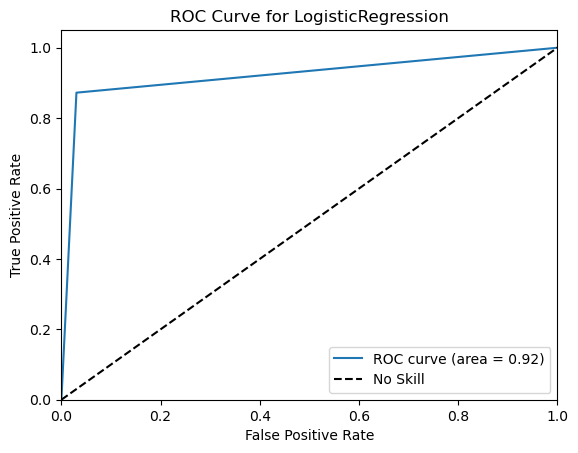

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.85      1.00      0.92        66
           1       1.00      0.74      0.85        47

    accuracy                           0.89       113
   macro avg       0.92      0.87      0.89       113
weighted avg       0.91      0.89      0.89       113



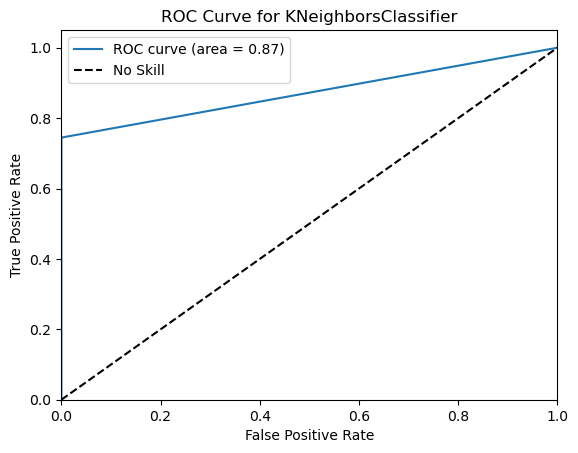

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.80      1.00      0.89        66
           1       1.00      0.66      0.79        47

    accuracy                           0.86       113
   macro avg       0.90      0.83      0.84       113
weighted avg       0.89      0.86      0.85       113



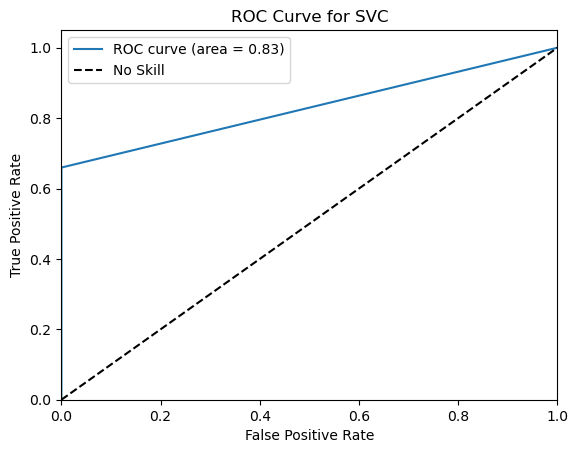

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.91      0.95        47

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



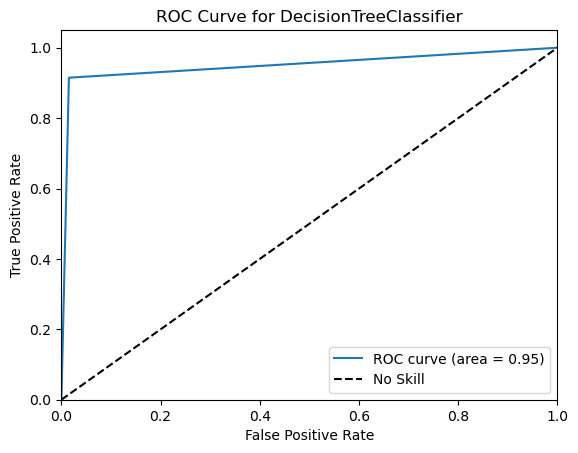

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        47

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



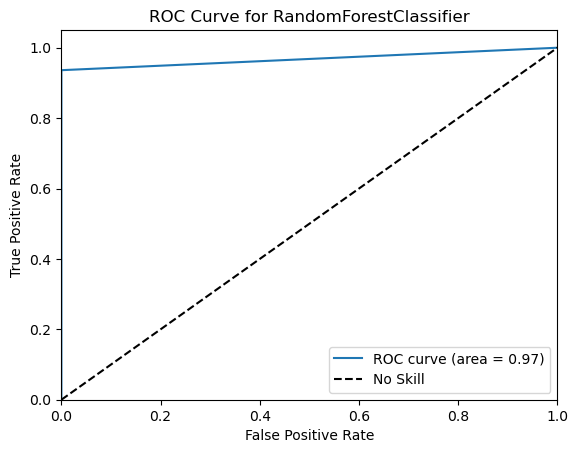

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        47

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



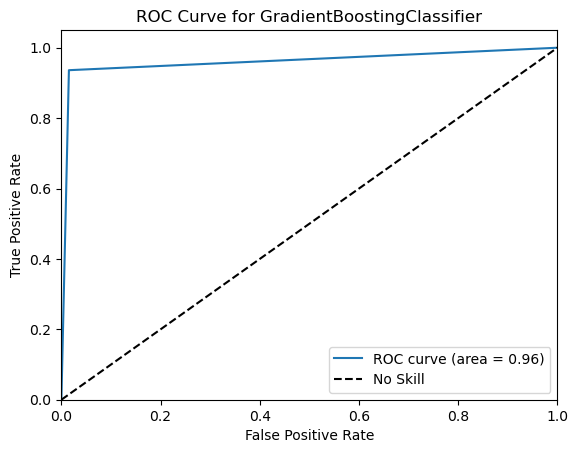

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.87      0.93        47

    accuracy                           0.95       113
   macro avg       0.96      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



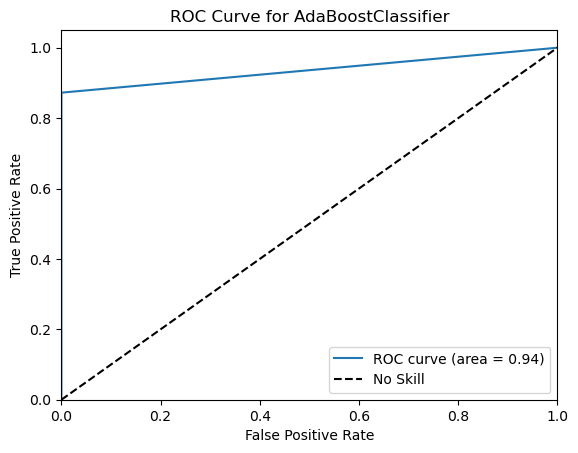

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.96      0.96      0.96        47

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



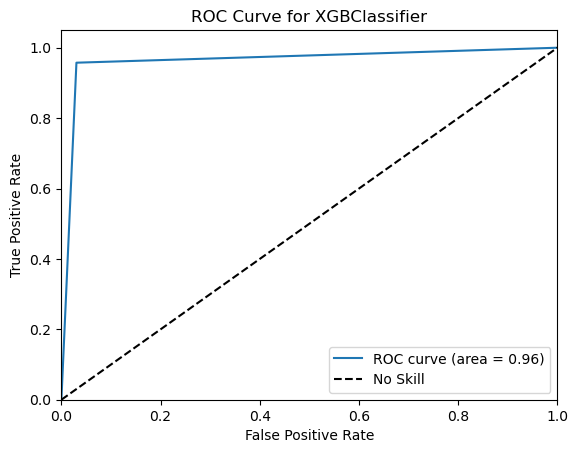

In [82]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# KFold ile 5 katlı çapraz doğrulama oluşturma
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Sözlük oluşturma, her model için ortalama doğruluk skorunu ve sınıflandırma raporunu depolamak için
avg_scores = {}
classification_reports = {}

for name, algo in models.items():
    # Her bir model için doğruluk skorlarını ve sınıflandırma raporlarını depolamak için boş bir liste oluşturma
    scores = []
    reports = []
    
    for train_index, test_index in kf.split(X):
        # Eğitim ve test setlerini oluşturma
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        # Modeli eğitme
        model = algo
        model.fit(X_train, y_train)
        
        # Modeli test etme
        y_pred = model.predict(X_test)
        
        # Doğruluk skorunu hesaplama ve skorları listeye ekleme
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        
        # Sınıflandırma raporunu hesaplama ve raporları listeye ekleme
        report = classification_report(y_test, y_pred)
        reports.append(report)
    
    
    # Ortalama doğruluk skorunu hesaplama ve sözlüğe ekleme
    avg_score = sum(scores) / len(scores)
    avg_scores[name] = avg_score
    classification_reports[name] = reports  # Tüm sınıflandırma raporlarını kaydet
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name)
    plt.legend()
    plt.show()



Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.97      0.98      0.98        66
           1       0.98      0.96      0.97        47

    accuracy                           0.97       113
   macro avg       0.97      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



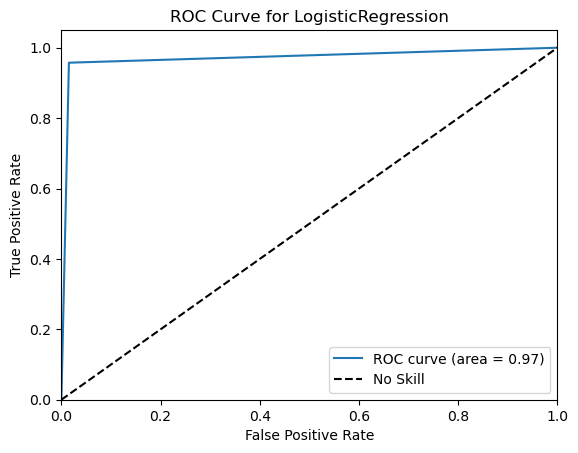

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.90      1.00      0.95        66
           1       1.00      0.85      0.92        47

    accuracy                           0.94       113
   macro avg       0.95      0.93      0.93       113
weighted avg       0.94      0.94      0.94       113



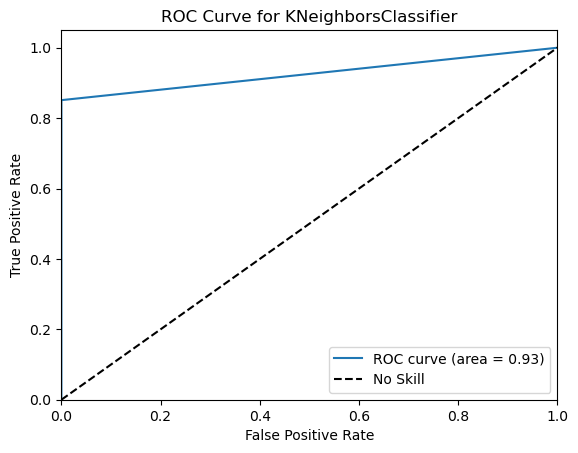

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        47

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



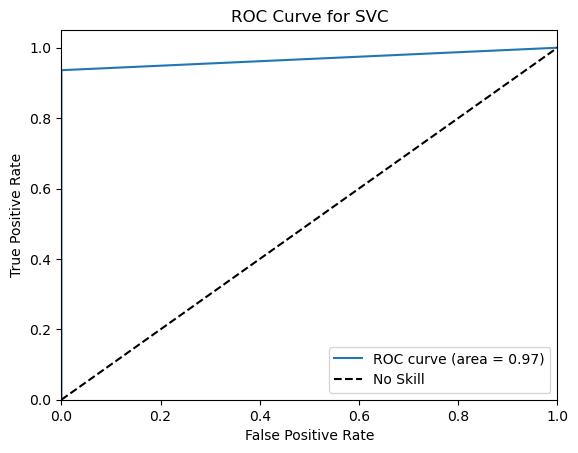

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.91      0.95        47

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



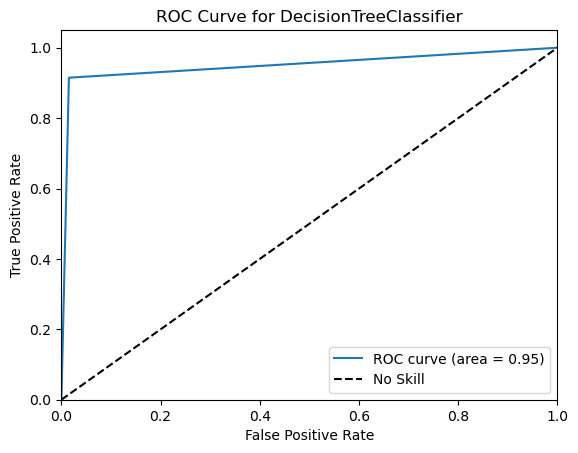

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        47

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



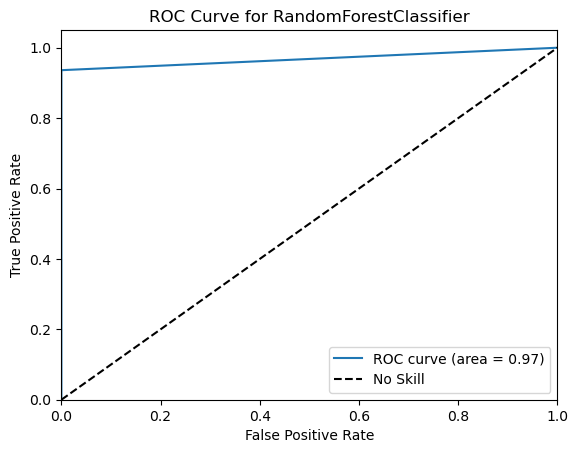

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        47

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



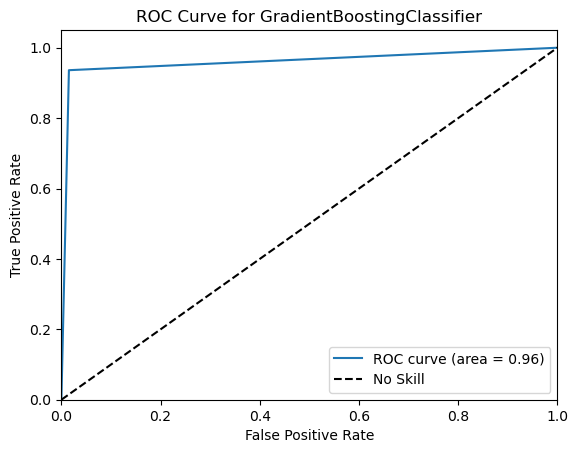

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.87      0.93        47

    accuracy                           0.95       113
   macro avg       0.96      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



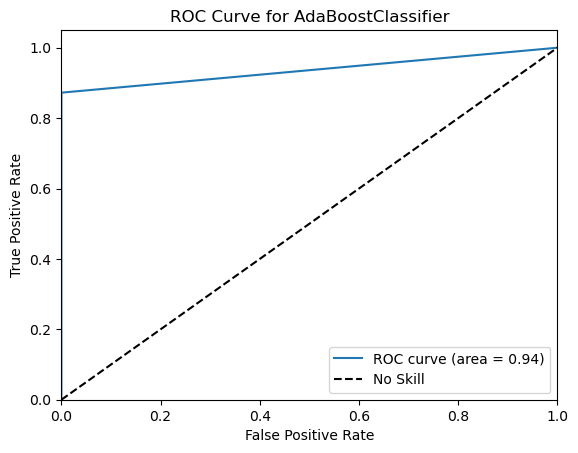

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.96      0.96      0.96        47

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



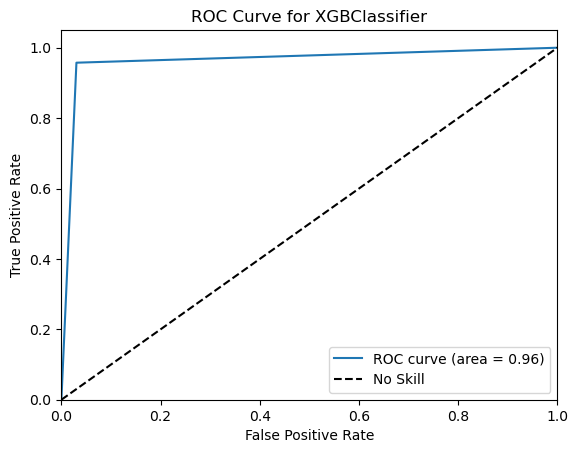

In [83]:
# z score norm
# başarı arttı

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# KFold ile 5 katlı çapraz doğrulama oluşturma
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Sözlük oluşturma, her model için ortalama doğruluk skorunu ve sınıflandırma raporunu depolamak için
avg_scores_z = {}
classification_reports_z = {}

scaler = StandardScaler()

for name, algo in models.items():
    # Her bir model için doğruluk skorlarını ve sınıflandırma raporlarını depolamak için boş bir liste oluşturma
    scores = []
    reports = []
    
    for train_index, test_index in kf.split(X):
        # Eğitim ve test setlerini oluşturma
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #z score norm
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        
        
        # Modeli eğitme
        model = algo
        model.fit(X_train, y_train)
        
        # Modeli test etme
        y_pred = model.predict(X_test)
        
        # Doğruluk skorunu hesaplama ve skorları listeye ekleme
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        
        # Sınıflandırma raporunu hesaplama ve raporları listeye ekleme
        report = classification_report(y_test, y_pred)
        reports.append(report)
    
    # Ortalama doğruluk skorunu hesaplama ve sözlüğe ekleme
    avg_score = sum(scores) / len(scores)
    avg_scores_z[name] = avg_score
    classification_reports_z[name] = reports  # Tüm sınıflandırma raporlarını kaydet
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name)
    plt.legend()
    plt.show()


Average Classification Report for LogisticRegression :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.87      0.93        47

    accuracy                           0.95       113
   macro avg       0.96      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



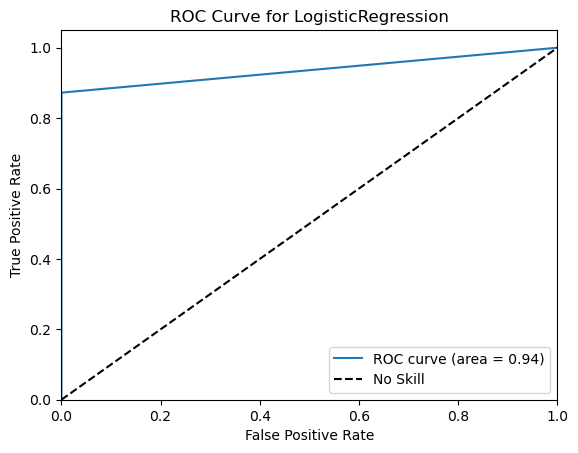

Average Classification Report for KNeighborsClassifier :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.87      0.93        47

    accuracy                           0.95       113
   macro avg       0.96      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



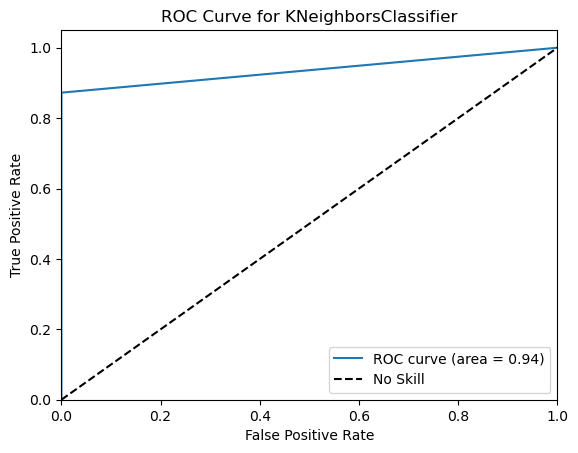

Average Classification Report for SVC :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        47

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



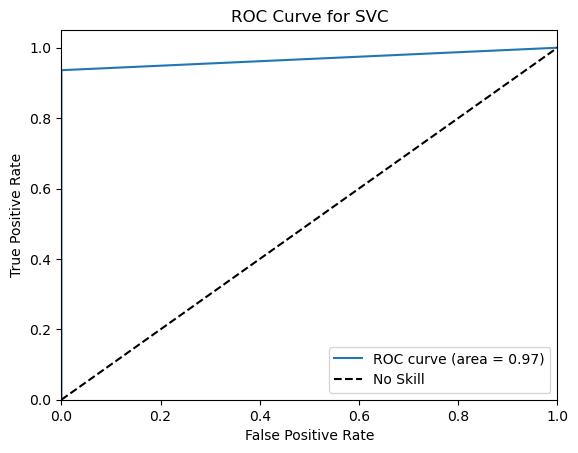

Average Classification Report for DecisionTreeClassifier :
              precision    recall  f1-score   support

           0       0.94      0.98      0.96        66
           1       0.98      0.91      0.95        47

    accuracy                           0.96       113
   macro avg       0.96      0.95      0.95       113
weighted avg       0.96      0.96      0.96       113



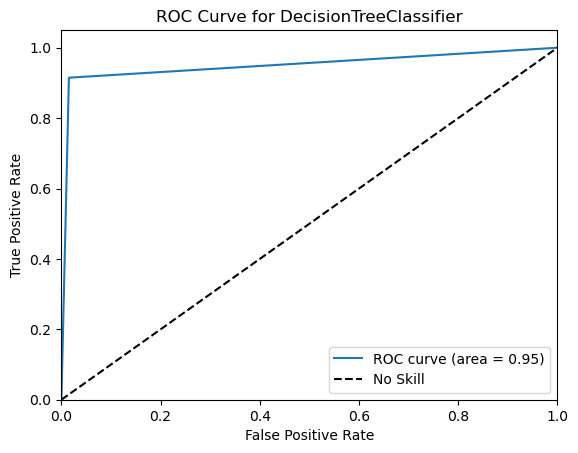

Average Classification Report for RandomForestClassifier :
              precision    recall  f1-score   support

           0       0.96      1.00      0.98        66
           1       1.00      0.94      0.97        47

    accuracy                           0.97       113
   macro avg       0.98      0.97      0.97       113
weighted avg       0.97      0.97      0.97       113



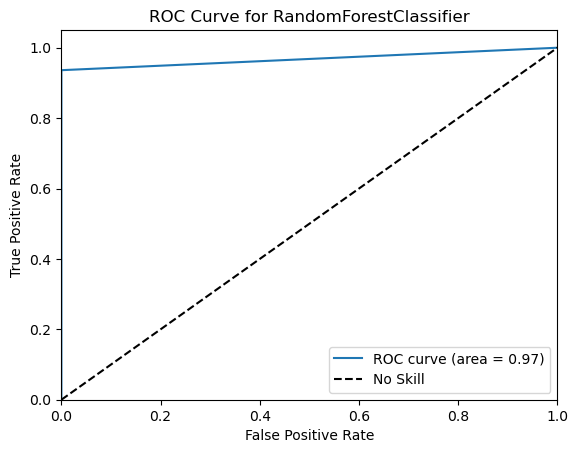

Average Classification Report for GradientBoostingClassifier :
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        66
           1       0.98      0.94      0.96        47

    accuracy                           0.96       113
   macro avg       0.97      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



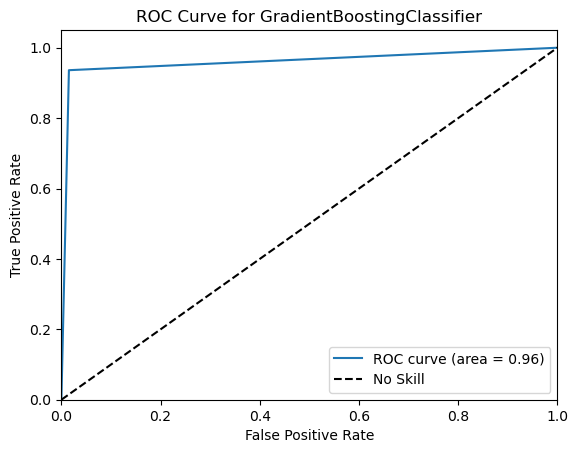

Average Classification Report for AdaBoostClassifier :
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        66
           1       1.00      0.87      0.93        47

    accuracy                           0.95       113
   macro avg       0.96      0.94      0.94       113
weighted avg       0.95      0.95      0.95       113



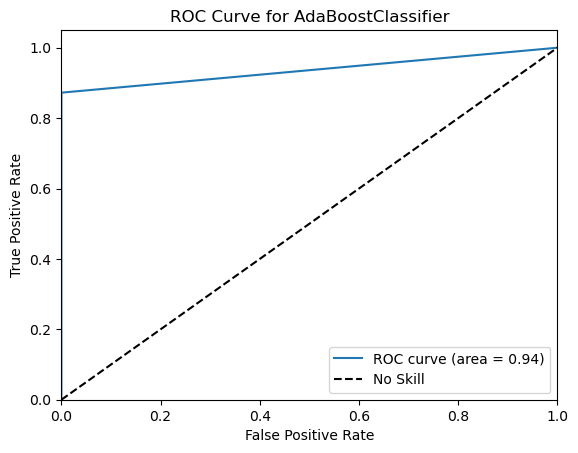

Average Classification Report for XGBClassifier :
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        66
           1       0.96      0.96      0.96        47

    accuracy                           0.96       113
   macro avg       0.96      0.96      0.96       113
weighted avg       0.96      0.96      0.96       113



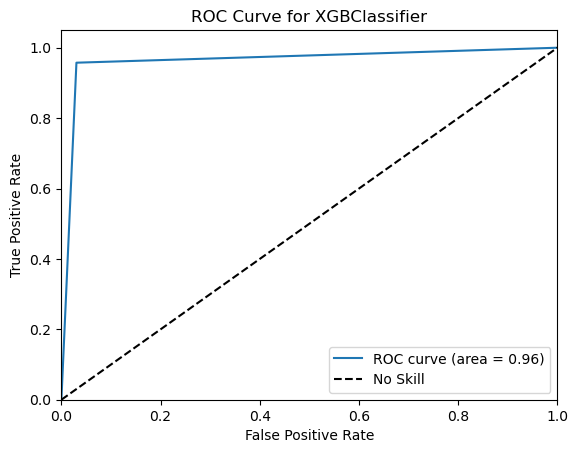

In [88]:
# min max norm
# başarı arttı

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

# KFold ile 5 katlı çapraz doğrulama oluşturma
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Sözlük oluşturma, her model için ortalama doğruluk skorunu ve sınıflandırma raporunu depolamak için
avg_scores_minmax = {}
classification_reports_minmax = {}

scaler = MinMaxScaler()

for name, algo in models.items():
    # Her bir model için doğruluk skorlarını ve sınıflandırma raporlarını depolamak için boş bir liste oluşturma
    scores = []
    reports = []
    
    for train_index, test_index in kf.split(X):
        # Eğitim ve test setlerini oluşturma
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y[train_index], y[test_index]
        
        #z score norm
        X_train=scaler.fit_transform(X_train)
        X_test=scaler.transform(X_test)
        
        
        # Modeli eğitme
        model = algo
        model.fit(X_train, y_train)
        
        # Modeli test etme
        y_pred = model.predict(X_test)
        
        # Doğruluk skorunu hesaplama ve skorları listeye ekleme
        acc = accuracy_score(y_test, y_pred)
        scores.append(acc)
        
        # Sınıflandırma raporunu hesaplama ve raporları listeye ekleme
        report = classification_report(y_test, y_pred)
        reports.append(report)
    
    # Ortalama doğruluk skorunu hesaplama ve sözlüğe ekleme
    avg_score = sum(scores) / len(scores)
    avg_scores_minmax[name] = avg_score
    classification_reports_minmax[name] = reports  # Tüm sınıflandırma raporlarını kaydet
    
    # Ortalama sınıflandırma raporunu ekrana bastırma
    print("Average Classification Report for", name, ":")
    print(classification_report(y_test, y_pred))
    print("="*50)
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
    roc_auc = auc(fpr, tpr)
    # Plot the ROC curve
    plt.figure()  
    plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for ' + name)
    plt.legend()
    plt.show()


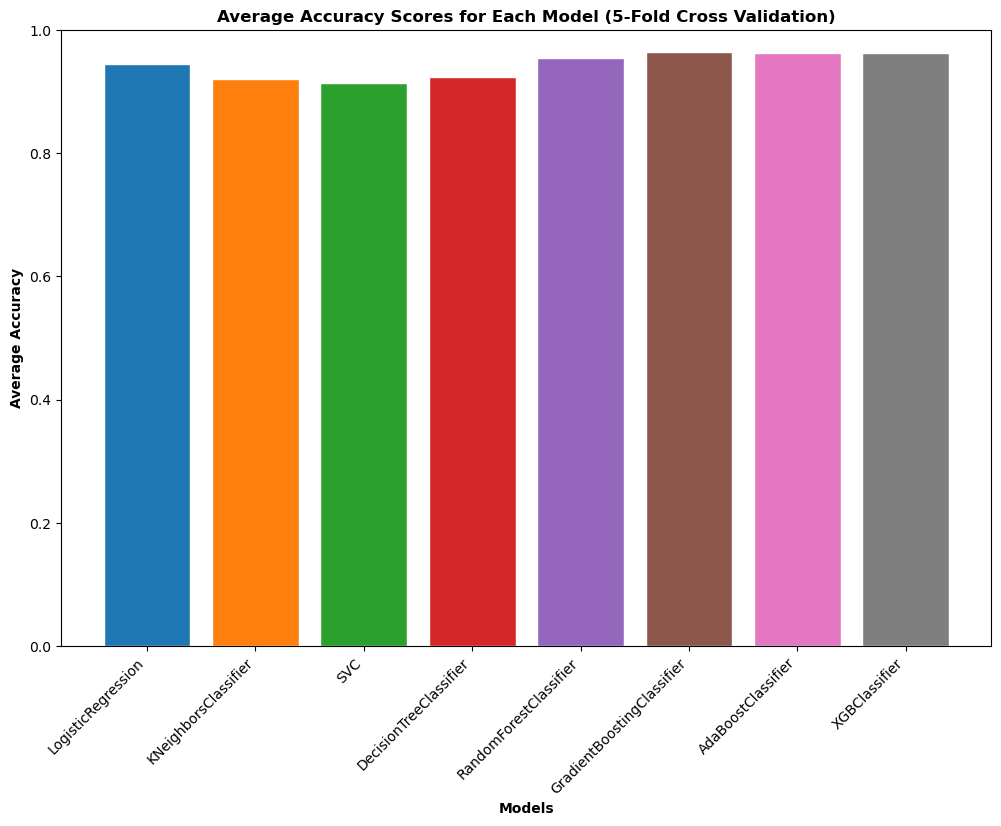

In [89]:
# Doğrulukları sütun grafiğiyle gösterme
plt.figure(figsize=(12, 8))

models_names = list(avg_scores.keys())
avg_accuracy = list(avg_scores.values())

x = np.arange(len(models_names))

plt.bar(x, avg_accuracy, color=plt.cm.tab10(x), edgecolor='white')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Average Accuracy', fontweight='bold')
plt.title('Average Accuracy Scores for Each Model (5-Fold Cross Validation)', fontweight='bold')
plt.xticks(x, models_names, rotation=45, ha='right')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla (doğruluk değerleri için)
plt.show()


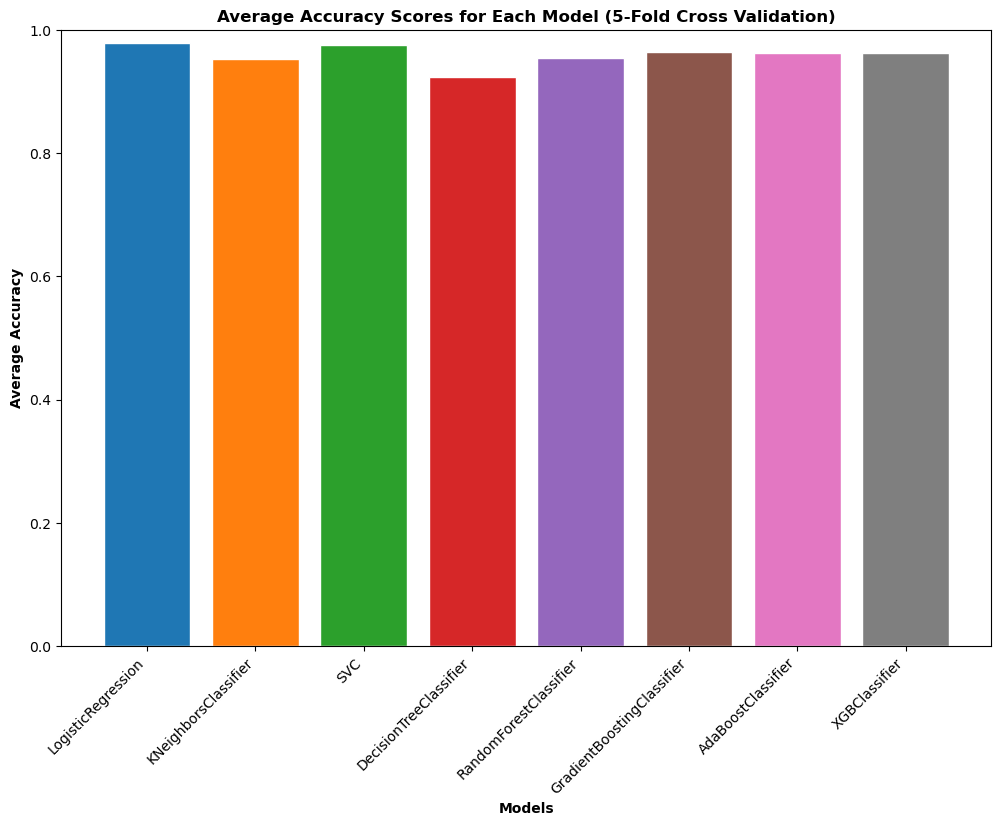

In [90]:
# z score

# Doğrulukları sütun grafiğiyle gösterme
plt.figure(figsize=(12, 8))

models_names = list(avg_scores_z.keys())
avg_accuracy = list(avg_scores_z.values())

x = np.arange(len(models_names))

plt.bar(x, avg_accuracy, color=plt.cm.tab10(x), edgecolor='white')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Average Accuracy', fontweight='bold')
plt.title('Average Accuracy Scores for Each Model (5-Fold Cross Validation)', fontweight='bold')
plt.xticks(x, models_names, rotation=45, ha='right')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla (doğruluk değerleri için)
plt.show()

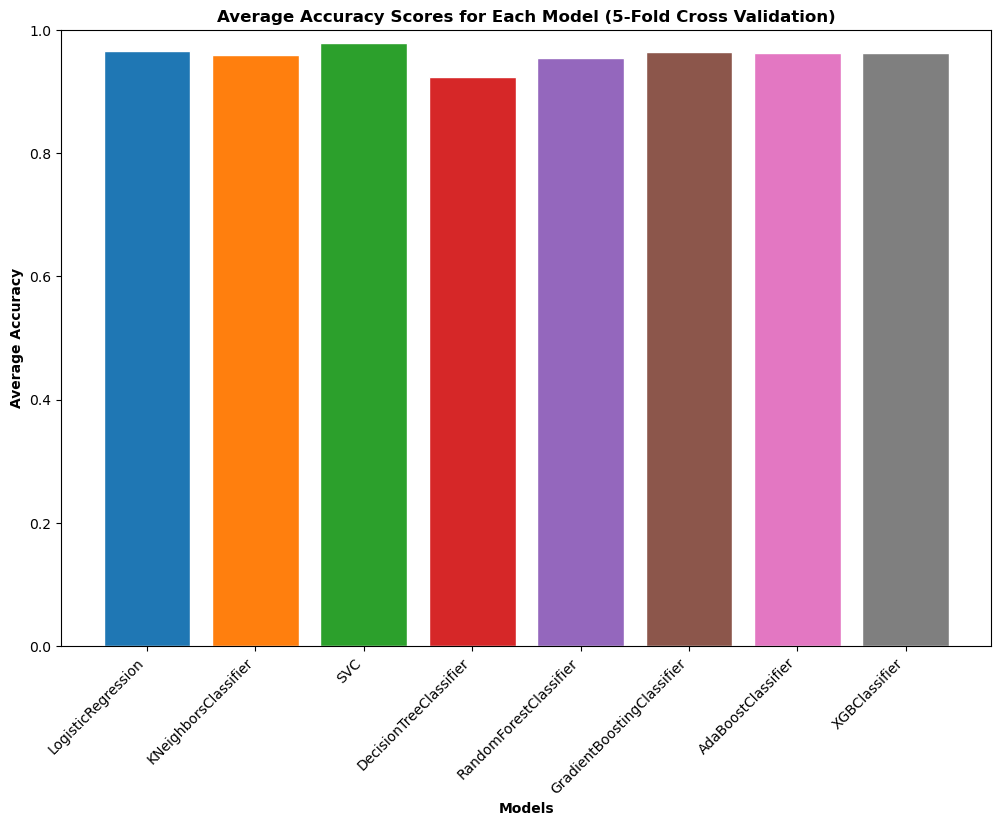

In [91]:
# minmax
# Doğrulukları sütun grafiğiyle gösterme
plt.figure(figsize=(12, 8))

models_names = list(avg_scores_minmax.keys())
avg_accuracy = list(avg_scores_minmax.values())

x = np.arange(len(models_names))

plt.bar(x, avg_accuracy, color=plt.cm.tab10(x), edgecolor='white')
plt.xlabel('Models', fontweight='bold')
plt.ylabel('Average Accuracy', fontweight='bold')
plt.title('Average Accuracy Scores for Each Model (5-Fold Cross Validation)', fontweight='bold')
plt.xticks(x, models_names, rotation=45, ha='right')
plt.ylim(0, 1)  # Y eksenini 0 ile 1 arasında sınırla (doğruluk değerleri için)
plt.show()

Voting Classifier Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



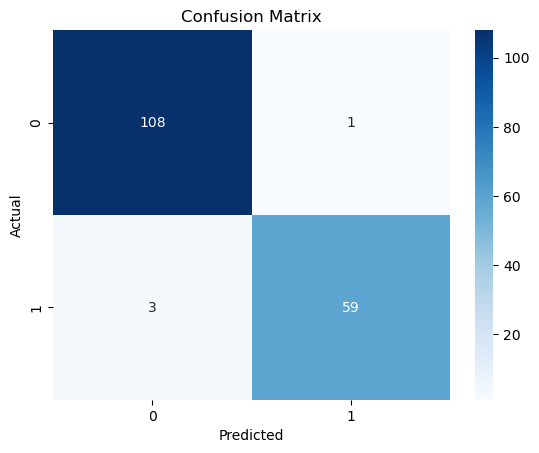

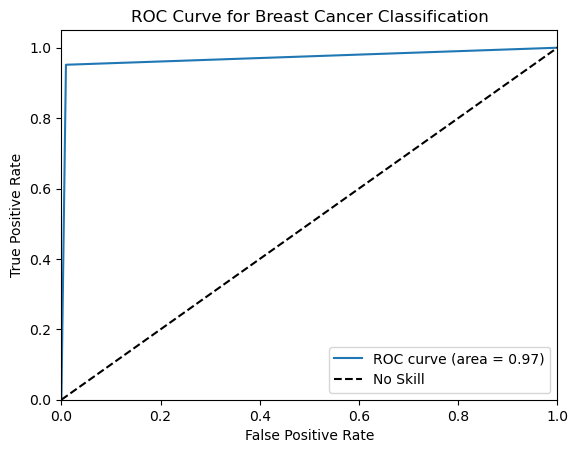

In [64]:
# norm yok

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

lr = LogisticRegression()
gb = GradientBoostingClassifier()
xgb_model = xgb.XGBClassifier()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Hyperparameter tuning
param_dist_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000, 10000]
}

param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7]
}



rs_lr = RandomizedSearchCV(lr, param_dist_lr, n_iter=10, cv=3, random_state=42)
rs_gb = RandomizedSearchCV(gb, param_dist_gb, n_iter=10, cv=3, random_state=42)
rs_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=10, cv=3, random_state=42)

# Fit the models
rs_lr.fit(X_train, y_train)
rs_gb.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

# Get the best models
best_lr = rs_lr.best_estimator_
best_gb = rs_gb.best_estimator_
best_xgb = rs_xgb.best_estimator_

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr), 
    ('gb', best_gb), 
    ('xgb', best_xgb)], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')
classification_report=classification_report(y_test,y_pred)
print(classification_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

Voting Classifier Accuracy: 0.9707602339181286
              precision    recall  f1-score   support

           0       0.97      0.98      0.98       109
           1       0.97      0.95      0.96        62

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



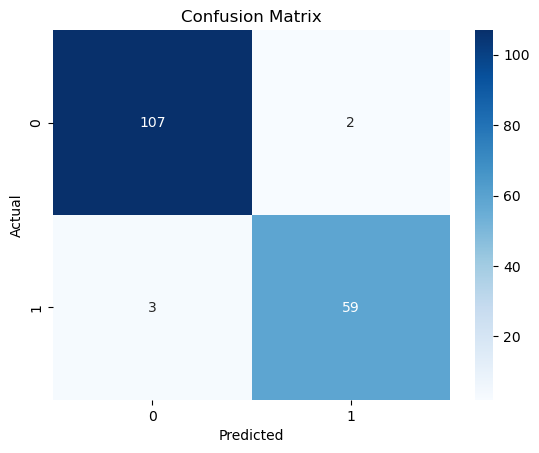

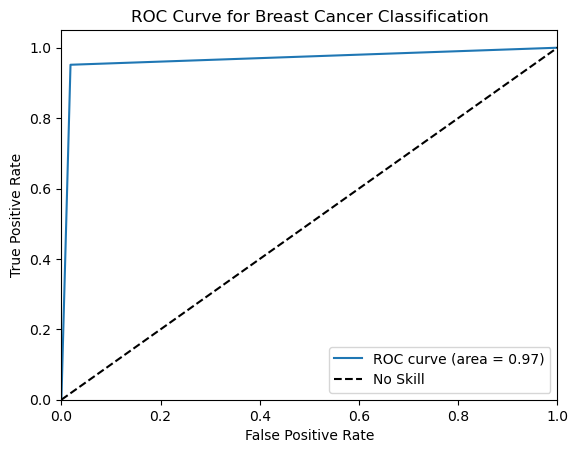

In [63]:
# minmax norm

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

lr = LogisticRegression()
gb = GradientBoostingClassifier()
xgb_model = xgb.XGBClassifier()


scaler = MinMaxScaler()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


# Hyperparameter tuning
param_dist_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000, 10000]
}

param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7]
}



rs_lr = RandomizedSearchCV(lr, param_dist_lr, n_iter=10, cv=3, random_state=42)
rs_gb = RandomizedSearchCV(gb, param_dist_gb, n_iter=10, cv=3, random_state=42)
rs_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=10, cv=3, random_state=42)

# Fit the models
rs_lr.fit(X_train, y_train)
rs_gb.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

# Get the best models
best_lr = rs_lr.best_estimator_
best_gb = rs_gb.best_estimator_
best_xgb = rs_xgb.best_estimator_

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr), 
    ('gb', best_gb), 
    ('xgb', best_xgb)], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')
classification_report=classification_report(y_test,y_pred)
print(classification_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()

Voting Classifier Accuracy: 0.9766081871345029
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       109
           1       0.98      0.95      0.97        62

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



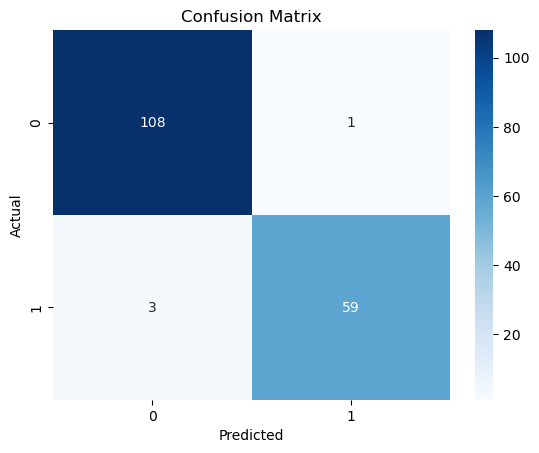

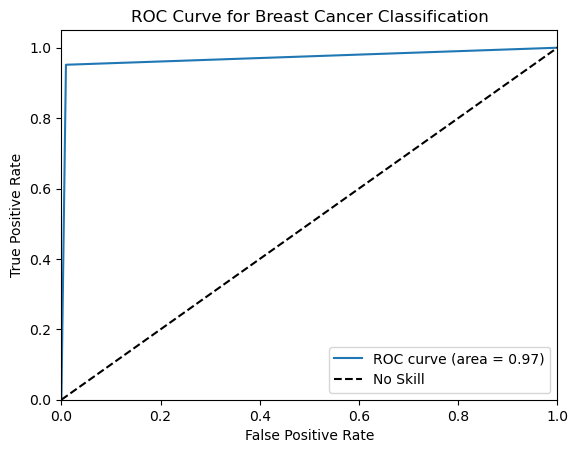

In [60]:
# z score norm

from sklearn.metrics import accuracy_score,classification_report
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier
import xgboost as xgb

lr = LogisticRegression()
gb = GradientBoostingClassifier()
xgb_model = xgb.XGBClassifier()


scaler = StandardScaler()

# Veri setini eğitim ve test setlerine ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#z score norm
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)



# Hyperparameter tuning
param_dist_lr = {
    'C': [0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [100, 1000, 10000]
}

param_dist_gb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

param_dist_xgb = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
    'colsample_bytree': [0.3, 0.7]
}



rs_lr = RandomizedSearchCV(lr, param_dist_lr, n_iter=10, cv=3, random_state=42)
rs_gb = RandomizedSearchCV(gb, param_dist_gb, n_iter=10, cv=3, random_state=42)
rs_xgb = RandomizedSearchCV(xgb_model, param_dist_xgb, n_iter=10, cv=3, random_state=42)

# Fit the models
rs_lr.fit(X_train, y_train)
rs_gb.fit(X_train, y_train)
rs_xgb.fit(X_train, y_train)

# Get the best models
best_lr = rs_lr.best_estimator_
best_gb = rs_gb.best_estimator_
best_xgb = rs_xgb.best_estimator_

# Voting Classifier
voting_clf = VotingClassifier(estimators=[
    ('lr', best_lr), 
    ('gb', best_gb), 
    ('xgb', best_xgb)], voting='hard')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Voting Classifier Accuracy: {accuracy}')
classification_report=classification_report(y_test,y_pred)
print(classification_report)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Breast Cancer Classification')
plt.legend()
plt.show()